# Analise da Estabilidade das Features

## 0 - Importação

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from optbinning import OptimalBinning
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


%matplotlib inline
pd.set_option('display.max_rows', 100)

import warnings

# Ignorar especificamente RuntimeWarning
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns',200)

## 1 - Leitura dos Dados

In [66]:
df = pd.read_csv('dados/df_trated_inputed.csv')
df

,y,safra,id,VAR_1,VAR_2,VAR_3,VAR_4,VAR_6,VAR_9,VAR_13,VAR_19,VAR_20,VAR_22,VAR_25,VAR_28,VAR_30,VAR_32,VAR_33,VAR_39,VAR_40,VAR_44,VAR_57,VAR_59,VAR_60,VAR_64,VAR_65,VAR_72,VAR_76,VAR_10_is_null,VAR_12_is_null,VAR_16_is_null,VAR_17_is_null,VAR_18_is_null,VAR_21_is_null,VAR_23_is_null,VAR_31_is_null,VAR_43_is_null,VAR_47_is_null,VAR_59_is_null,VAR_66_is_null,VAR_69_is_null,VAR_76_is_null,VAR_77_is_null
0,0,201404,1,0.0,0.0,0.0,0.0,3277.0,500.00,73.260,45.0,8.0,63.0,12.0,12.0,500.00,0.133833,18.0,348.0,9.0,11.0,45.0,95.540,-0.030478,0.0,1303.790,151.0,173.060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,201407,2,64.0,0.0,0.0,1.0,2443.0,1000.00,38.530,18.0,12.0,31.0,9.0,10.0,1000.00,0.133833,13.0,179.0,5.0,9.0,60.0,97.730,0.357324,0.0,1486.260,187.0,184.690,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,201405,3,99.0,0.0,0.0,2.0,1824.0,1893.35,61.053,2.0,12.0,4.0,3.0,5.0,1893.35,0.133833,2.0,190.8,4.0,12.0,31.0,294.570,-0.411787,0.0,800.270,96.0,732.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,201403,5,0.0,0.0,0.0,0.0,437.0,2000.00,50.321,0.0,12.0,0.0,0.0,0.0,2000.00,0.090634,0.0,177.9,0.0,0.0,38.0,55.992,-0.231735,1.0,1457.780,75.0,124.880,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0,201405,6,61.0,0.0,0.6,1.0,140.0,400.00,80.098,0.0,10.0,0.0,0.0,0.0,400.00,0.046709,0.0,186.3,0.0,0.0,33.0,25.591,-0.354108,1.0,390.540,5.0,76.205,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10733,0,201411,10703,0.0,0.0,0.0,0.0,4772.0,700.00,10.390,11.0,12.0,21.0,0.0,0.0,2100.00,0.133833,10.0,51.0,0.0,0.0,72.0,39.890,0.721630,1.0,944.402,200.0,48.490,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
10734,0,201412,10706,16.0,0.0,0.0,0.0,599.0,900.00,50.170,0.0,6.0,0.0,0.0,0.0,900.00,0.133833,0.0,166.0,0.0,0.0,26.0,94.330,-0.411787,1.0,817.986,130.0,157.910,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
10735,1,201411,10713,0.0,0.0,0.0,0.0,4393.0,1632.19,46.017,22.0,12.0,24.0,0.0,0.0,1632.19,0.133833,2.0,176.8,0.0,0.0,33.0,140.955,-0.354108,1.0,1338.210,157.0,259.664,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10736,0,201412,10727,15.0,0.0,0.0,0.0,616.0,800.00,67.770,0.0,8.0,0.0,0.0,0.0,800.00,0.133833,0.0,237.0,0.0,0.0,36.0,160.170,-0.231735,1.0,613.800,281.0,193.380,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0


In [67]:
df[df.isnull().any(axis=1)]

,y,safra,id,VAR_1,VAR_2,VAR_3,VAR_4,VAR_6,VAR_9,VAR_13,VAR_19,VAR_20,VAR_22,VAR_25,VAR_28,VAR_30,VAR_32,VAR_33,VAR_39,VAR_40,VAR_44,VAR_57,VAR_59,VAR_60,VAR_64,VAR_65,VAR_72,VAR_76,VAR_10_is_null,VAR_12_is_null,VAR_16_is_null,VAR_17_is_null,VAR_18_is_null,VAR_21_is_null,VAR_23_is_null,VAR_31_is_null,VAR_43_is_null,VAR_47_is_null,VAR_59_is_null,VAR_66_is_null,VAR_69_is_null,VAR_76_is_null,VAR_77_is_null


## 2 - Correlação Features

In [68]:
target='y'

In [69]:
df_train = df[df['safra']<=201408]
df_train['safra'].min(),df_train['safra'].max()

(np.int64(201401), np.int64(201408))

In [70]:
df_train_tmp = df_train[list(df.columns)]
df_corr = df_train_tmp.drop(columns=['safra', 'id', target])
df_corr = df_corr.corr(method='spearman')
df_corr

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_6,VAR_9,VAR_13,VAR_19,VAR_20,VAR_22,VAR_25,VAR_28,VAR_30,VAR_32,VAR_33,VAR_39,VAR_40,VAR_44,VAR_57,VAR_59,VAR_60,VAR_64,VAR_65,VAR_72,VAR_76,VAR_10_is_null,VAR_12_is_null,VAR_16_is_null,VAR_17_is_null,VAR_18_is_null,VAR_21_is_null,VAR_23_is_null,VAR_31_is_null,VAR_43_is_null,VAR_47_is_null,VAR_59_is_null,VAR_66_is_null,VAR_69_is_null,VAR_76_is_null,VAR_77_is_null
VAR_1,1.000000,0.526901,0.646561,0.808017,-0.015161,-0.039979,0.047457,-0.034056,-0.011014,-0.026935,-0.026052,-0.007331,-0.111120,-0.003634,-0.010770,0.059925,-0.008025,0.025262,-0.132375,0.023125,-0.131123,-0.003892,-0.190644,-0.206024,0.140367,-0.007312,0.000801,0.022673,0.094583,0.026766,0.026766,-0.007312,0.051615,0.000801,0.021753,-0.025999,-0.007312,-0.007312,-0.025999,-0.007312
VAR_2,0.526901,1.000000,0.758115,0.448905,-0.129690,-0.054576,-0.010709,-0.094416,-0.001322,-0.094713,-0.092878,-0.086726,-0.094951,-0.122397,-0.090646,0.032156,-0.088447,-0.079604,-0.118619,-0.072323,-0.116878,0.075509,-0.143348,-0.141424,0.013641,0.082154,0.079730,0.078595,-0.011103,0.096986,0.096986,0.082154,0.058902,0.079730,0.077936,0.099832,0.082154,0.082154,0.099832,0.082154
VAR_3,0.646561,0.758115,1.000000,0.610389,-0.124181,-0.067593,0.001368,-0.099637,0.003550,-0.097158,-0.107817,-0.100860,-0.117105,-0.102999,-0.090618,0.034507,-0.097625,-0.084534,-0.122462,-0.058523,-0.121685,0.080967,-0.156009,-0.150236,0.036384,0.087589,0.104043,0.075702,0.035102,0.101399,0.101399,0.087589,0.072197,0.104043,0.074562,0.083087,0.087589,0.087589,0.083087,0.087589
VAR_4,0.808017,0.448905,0.610389,1.000000,-0.002927,-0.044504,0.054567,-0.029595,0.002045,-0.022421,-0.028363,-0.013428,-0.107670,0.025965,-0.009575,0.057671,-0.018983,0.013824,-0.120648,0.016086,-0.120095,0.002433,-0.173050,-0.140875,0.130669,-0.008168,0.013039,0.014848,0.076461,0.020414,0.020414,-0.008168,0.024787,0.013039,0.013971,-0.022485,-0.008168,-0.008168,-0.022485,-0.008168
VAR_6,-0.015161,-0.129690,-0.124181,-0.002927,1.000000,0.170563,0.276406,0.813124,-0.006688,0.820800,0.679179,0.691396,0.159794,0.829292,0.814721,0.269259,0.684574,0.698129,0.170252,0.460915,0.168939,-0.633104,0.383610,0.123405,0.369691,-0.622559,-0.647191,-0.680069,-0.176492,-0.813548,-0.813548,-0.622559,-0.535115,-0.647191,-0.680113,-0.575997,-0.622559,-0.622559,-0.575997,-0.622559
VAR_9,-0.039979,-0.054576,-0.067593,-0.044504,0.170563,1.000000,0.127519,0.130276,0.505623,0.131841,0.135285,0.135476,0.856989,0.153072,0.125990,0.161081,0.148348,0.146043,0.203824,0.169015,0.203087,-0.129985,0.144698,0.061388,0.131749,-0.128804,-0.130531,-0.172838,-0.176374,-0.130718,-0.130718,-0.128804,-0.273569,-0.130531,-0.172591,-0.124111,-0.128804,-0.128804,-0.124111,-0.128804
VAR_13,0.047457,-0.010709,0.001368,0.054567,0.276406,0.127519,1.000000,0.199437,-0.020751,0.198448,0.211939,0.213453,0.115491,0.312255,0.189995,0.862616,0.276085,0.278566,-0.001667,0.418287,-0.003657,-0.215470,0.119817,-0.041900,0.407741,-0.280752,-0.193856,-0.184182,-0.040183,-0.194164,-0.194164,-0.280752,-0.133399,-0.193856,-0.184350,-0.317245,-0.280752,-0.280752,-0.317245,-0.280752
VAR_19,-0.034056,-0.094416,-0.099637,-0.029595,0.813124,0.130276,0.199437,1.000000,0.005182,0.991126,0.691616,0.685578,0.130394,0.465254,0.969195,0.211284,0.484494,0.483462,0.191710,0.285205,0.190136,-0.464205,0.437813,0.052220,0.232947,-0.349708,-0.565679,-0.680360,-0.120049,-0.948996,-0.948996,-0.349708,-0.449359,-0.565679,-0.679853,-0.270456,-0.349708,-0.349708,-0.270456,-0.349708
VAR_20,-0.011014,-0.001322,0.003550,0.002045,-0.006688,0.505623,-0.020751,0.005182,1.000000,0.005903,0.019314,0.018255,0.399637,-0.009338,0.001685,0.020146,0.009206,0.005968,0.111033,0.022056,0.111428,-0.010859,0.016311,0.020656,-0.005883,0.005736,-0.020415,-0.038695,-0.079041,-0.004673,-0.004673,0.005736,-0.104081,-0.020415,-0.039041,0.017639,0.005736,0.005736,0.017639,0.005736
VAR_22,-0.026935,-0.094713,-0.097158,-0.022421,0.820800,0.131841,0.198448,0.991126,0.005903,1.000000,0.694001,0.689266,0.130903,0.470

In [71]:
list_remove = [
#     'VAR_2',	
#  'VAR_4',
#  'VAR_17_is_null',
#  'VAR_3',
#  'VAR_76',
# 'VAR_59'
]

df_train_tmp = df_train[list(df.columns)]
df_train_tmp = df_train_tmp.drop(columns=list_remove)

df_corr_2 = df_corr.drop(columns=list_remove)
df_corr_2 = df_corr_2[~df_corr_2.index.isin(list_remove)]
df_corr_2

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_6,VAR_9,VAR_13,VAR_19,VAR_20,VAR_22,VAR_25,VAR_28,VAR_30,VAR_32,VAR_33,VAR_39,VAR_40,VAR_44,VAR_57,VAR_59,VAR_60,VAR_64,VAR_65,VAR_72,VAR_76,VAR_10_is_null,VAR_12_is_null,VAR_16_is_null,VAR_17_is_null,VAR_18_is_null,VAR_21_is_null,VAR_23_is_null,VAR_31_is_null,VAR_43_is_null,VAR_47_is_null,VAR_59_is_null,VAR_66_is_null,VAR_69_is_null,VAR_76_is_null,VAR_77_is_null
VAR_1,1.000000,0.526901,0.646561,0.808017,-0.015161,-0.039979,0.047457,-0.034056,-0.011014,-0.026935,-0.026052,-0.007331,-0.111120,-0.003634,-0.010770,0.059925,-0.008025,0.025262,-0.132375,0.023125,-0.131123,-0.003892,-0.190644,-0.206024,0.140367,-0.007312,0.000801,0.022673,0.094583,0.026766,0.026766,-0.007312,0.051615,0.000801,0.021753,-0.025999,-0.007312,-0.007312,-0.025999,-0.007312
VAR_2,0.526901,1.000000,0.758115,0.448905,-0.129690,-0.054576,-0.010709,-0.094416,-0.001322,-0.094713,-0.092878,-0.086726,-0.094951,-0.122397,-0.090646,0.032156,-0.088447,-0.079604,-0.118619,-0.072323,-0.116878,0.075509,-0.143348,-0.141424,0.013641,0.082154,0.079730,0.078595,-0.011103,0.096986,0.096986,0.082154,0.058902,0.079730,0.077936,0.099832,0.082154,0.082154,0.099832,0.082154
VAR_3,0.646561,0.758115,1.000000,0.610389,-0.124181,-0.067593,0.001368,-0.099637,0.003550,-0.097158,-0.107817,-0.100860,-0.117105,-0.102999,-0.090618,0.034507,-0.097625,-0.084534,-0.122462,-0.058523,-0.121685,0.080967,-0.156009,-0.150236,0.036384,0.087589,0.104043,0.075702,0.035102,0.101399,0.101399,0.087589,0.072197,0.104043,0.074562,0.083087,0.087589,0.087589,0.083087,0.087589
VAR_4,0.808017,0.448905,0.610389,1.000000,-0.002927,-0.044504,0.054567,-0.029595,0.002045,-0.022421,-0.028363,-0.013428,-0.107670,0.025965,-0.009575,0.057671,-0.018983,0.013824,-0.120648,0.016086,-0.120095,0.002433,-0.173050,-0.140875,0.130669,-0.008168,0.013039,0.014848,0.076461,0.020414,0.020414,-0.008168,0.024787,0.013039,0.013971,-0.022485,-0.008168,-0.008168,-0.022485,-0.008168
VAR_6,-0.015161,-0.129690,-0.124181,-0.002927,1.000000,0.170563,0.276406,0.813124,-0.006688,0.820800,0.679179,0.691396,0.159794,0.829292,0.814721,0.269259,0.684574,0.698129,0.170252,0.460915,0.168939,-0.633104,0.383610,0.123405,0.369691,-0.622559,-0.647191,-0.680069,-0.176492,-0.813548,-0.813548,-0.622559,-0.535115,-0.647191,-0.680113,-0.575997,-0.622559,-0.622559,-0.575997,-0.622559
VAR_9,-0.039979,-0.054576,-0.067593,-0.044504,0.170563,1.000000,0.127519,0.130276,0.505623,0.131841,0.135285,0.135476,0.856989,0.153072,0.125990,0.161081,0.148348,0.146043,0.203824,0.169015,0.203087,-0.129985,0.144698,0.061388,0.131749,-0.128804,-0.130531,-0.172838,-0.176374,-0.130718,-0.130718,-0.128804,-0.273569,-0.130531,-0.172591,-0.124111,-0.128804,-0.128804,-0.124111,-0.128804
VAR_13,0.047457,-0.010709,0.001368,0.054567,0.276406,0.127519,1.000000,0.199437,-0.020751,0.198448,0.211939,0.213453,0.115491,0.312255,0.189995,0.862616,0.276085,0.278566,-0.001667,0.418287,-0.003657,-0.215470,0.119817,-0.041900,0.407741,-0.280752,-0.193856,-0.184182,-0.040183,-0.194164,-0.194164,-0.280752,-0.133399,-0.193856,-0.184350,-0.317245,-0.280752,-0.280752,-0.317245,-0.280752
VAR_19,-0.034056,-0.094416,-0.099637,-0.029595,0.813124,0.130276,0.199437,1.000000,0.005182,0.991126,0.691616,0.685578,0.130394,0.465254,0.969195,0.211284,0.484494,0.483462,0.191710,0.285205,0.190136,-0.464205,0.437813,0.052220,0.232947,-0.349708,-0.565679,-0.680360,-0.120049,-0.948996,-0.948996,-0.349708,-0.449359,-0.565679,-0.679853,-0.270456,-0.349708,-0.349708,-0.270456,-0.349708
VAR_20,-0.011014,-0.001322,0.003550,0.002045,-0.006688,0.505623,-0.020751,0.005182,1.000000,0.005903,0.019314,0.018255,0.399637,-0.009338,0.001685,0.020146,0.009206,0.005968,0.111033,0.022056,0.111428,-0.010859,0.016311,0.020656,-0.005883,0.005736,-0.020415,-0.038695,-0.079041,-0.004673,-0.004673,0.005736,-0.104081,-0.020415,-0.039041,0.017639,0.005736,0.005736,0.017639,0.005736
VAR_22,-0.026935,-0.094713,-0.097158,-0.022421,0.820800,0.131841,0.198448,0.991126,0.005903,1.000000,0.694001,0.689266,0.130903,0.470

In [72]:
list_exclude = [
#     'VAR_2',	
#  'VAR_4',
#  'VAR_17_is_null',
#  'VAR_3',
#  'VAR_76',
# 'VAR_59'
]
for col in df_train.drop(columns=['y','safra','id']).columns.values:
    
    if (col not in list_exclude) and (col in list(df_train_tmp.columns)):
        df_tmp = df_corr_2[[col]]
        df_tmp = df_tmp[((df_tmp[col]>=0.9)|(df_tmp[col]<=-0.9)) & (df_tmp.index != col) & (~df_tmp.index.isin(list_exclude))]
        list_exclude.extend(df_tmp.index)

list_features = set(df_corr_2.columns)
list_features = list(set(list_features) - set(list_exclude))

list(list_features)

['VAR_40',
 'VAR_1',
 'VAR_25',
 'VAR_65',
 'VAR_10_is_null',
 'VAR_13',
 'VAR_17_is_null',
 'VAR_59',
 'VAR_16_is_null',
 'VAR_39',
 'VAR_72',
 'VAR_3',
 'VAR_32',
 'VAR_12_is_null',
 'VAR_30',
 'VAR_31_is_null',
 'VAR_2',
 'VAR_6',
 'VAR_4',
 'VAR_57',
 'VAR_64',
 'VAR_9',
 'VAR_76',
 'VAR_20',
 'VAR_59_is_null',
 'VAR_19']

In [73]:
len(list_features)

26

In [74]:
len(df_train.drop(columns=['y','safra','id']).columns)

40

In [75]:
list_filter = ['id', target, 'safra',] + list_features

In [76]:
df_features_top = df[list_filter]
df_features_top

,id,y,safra,VAR_40,VAR_1,VAR_25,VAR_65,VAR_10_is_null,VAR_13,VAR_17_is_null,VAR_59,VAR_16_is_null,VAR_39,VAR_72,VAR_3,VAR_32,VAR_12_is_null,VAR_30,VAR_31_is_null,VAR_2,VAR_6,VAR_4,VAR_57,VAR_64,VAR_9,VAR_76,VAR_20,VAR_59_is_null,VAR_19
0,1,0,201404,9.0,0.0,12.0,1303.790,0.0,73.260,0.0,95.540,0.0,348.0,151.0,0.0,0.133833,0.0,500.00,0.0,0.0,3277.0,0.0,45.0,0.0,500.00,173.060,8.0,0.0,45.0
1,2,0,201407,5.0,64.0,9.0,1486.260,0.0,38.530,1.0,97.730,0.0,179.0,187.0,0.0,0.133833,0.0,1000.00,0.0,0.0,2443.0,1.0,60.0,0.0,1000.00,184.690,12.0,0.0,18.0
2,3,0,201405,4.0,99.0,3.0,800.270,0.0,61.053,1.0,294.570,0.0,190.8,96.0,0.0,0.133833,0.0,1893.35,1.0,0.0,1824.0,2.0,31.0,0.0,1893.35,732.000,12.0,0.0,2.0
3,5,1,201403,0.0,0.0,0.0,1457.780,1.0,50.321,1.0,55.992,1.0,177.9,75.0,0.0,0.090634,1.0,2000.00,0.0,0.0,437.0,0.0,38.0,1.0,2000.00,124.880,12.0,1.0,0.0
4,6,0,201405,0.0,61.0,0.0,390.540,1.0,80.098,1.0,25.591,1.0,186.3,5.0,0.6,0.046709,1.0,400.00,1.0,0.0,140.0,1.0,33.0,1.0,400.00,76.205,10.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10733,10703,0,201411,0.0,0.0,0.0,944.402,1.0,10.390,0.0,39.890,1.0,51.0,200.0,0.0,0.133833,1.0,2100.00,0.0,0.0,4772.0,0.0,72.0,1.0,700.00,48.490,12.0,0.0,11.0
10734,10706,0,201412,0.0,16.0,0.0,817.986,1.0,50.170,1.0,94.330,1.0,166.0,130.0,0.0,0.133833,1.0,900.00,1.0,0.0,599.0,0.0,26.0,1.0,900.00,157.910,6.0,0.0,0.0
10735,10713,1,201411,0.0,0.0,0.0,1338.210,1.0,46.017,1.0,140.955,1.0,176.8,157.0,0.0,0.133833,1.0,1632.19,1.0,0.0,4393.0,0.0,33.0,1.0,1632.19,259.664,12.0,1.0,22.0
10736,10727,0,201412,0.0,15.0,0.0,613.800,1.0,67.770,0.0,160.170,1.0,237.0,281.0,0.0,0.133833,1.0,800.00,0.0,0.0,616.0,0.0,36.0,1.0,800.00,193.380,8.0,0.0,0.0


In [77]:
def generate_bins_new(df, feature, target, max_bin):
    optb = OptimalBinning(
        name=feature,
        min_event_rate_diff=0.001,
        dtype="numerical",
        solver="cp",
        min_n_bins = 2,
        max_pvalue = 0.05,
        max_n_bins = max_bin,
        min_prebin_size=0.05, #0.01,
        monotonic_trend="auto_asc_desc")
    
    optb.fit(df[feature].values, df[target].values)
    
    return optb

def iv_woe(df_data, feature, target, max_bin=5):
    optb = generate_bins_new(df_data[df_data['safra']<=201408], feature, target, max_bin)

    list_safras = list(sorted(df_data['safra'].unique()))
    
    list_dfs = []

    for safra in list_safras:
        df_tmp = df_data[df_data['safra']==safra]
        
        # df_tmp = df_data[df_data['month_ref']==safra]
        
        bins =  optb.transform(df_tmp[feature], metric="bins")
        d0 = pd.DataFrame({'x': bins, 'y': df_tmp[target]})

        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
    
        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value= feature)

        d.rename(columns={'Cutoff':'bin'}, inplace=True)
        d['safra'] = safra
        d = d[['safra', 'bin','Variable', 'WoE', 'IV', 'N']]
        
        list_dfs.append(d)

    df_iv_woe_ref = pd.concat(list_dfs)
    
    return df_iv_woe_ref
    
def create_woe_iv(df_data, target, list_features, dict_bins):
    list_dfs = []
    
    for feature in list_features:
        print(feature)
    
        if len(dict_bins)>0:
            df_tmp = iv_woe(df_data, feature, target, dict_bins[feature])
            list_dfs.append(df_tmp)
            
        else:
            df_tmp = iv_woe(df_data, feature, target)
            list_dfs.append(df_tmp)
            
    df_iv_woe_ref = pd.concat(list_dfs)
    return df_iv_woe_ref

In [83]:
list_rmv = [
 'VAR_13',
 'VAR_17_is_null',


 'VAR_39',

 'VAR_3',
 
 
 

 'VAR_2',
 
 'VAR_4',



 'VAR_76',
 
 'VAR_59_is_null',
     
]

# ficar de olho na var 1 e 59_is)_null

list_features = list(set(list_features)-set(list_rmv))


dict_bins = {
'VAR_40':3,
'VAR_12_is_null':2,
 'VAR_1':2,
'VAR_30':3,
 'VAR_25':2,
 'VAR_31_is_null':2,
 'VAR_65':3,
 'VAR_10_is_null':2,
'VAR_6':3,
 'VAR_57':3,
 'VAR_64':2,
 'VAR_9':3,
'VAR_20':2,
 'VAR_59':2,
 'VAR_16_is_null':2,
'VAR_19':3,
 'VAR_72':2,
'VAR_32':2,

    
    
}

df_iv_woe_ref = create_woe_iv(df_features_top, target, list_features, dict_bins)
df_iv_woe_ref.head()

VAR_40
VAR_57
VAR_6
VAR_12_is_null
VAR_64
VAR_1
VAR_9
VAR_30
VAR_25
VAR_31_is_null
VAR_20
VAR_65
VAR_10_is_null
VAR_59
VAR_16_is_null
VAR_19
VAR_72
VAR_32


,safra,bin,Variable,WoE,IV,N
0,201401,"(-inf, 0.40)",VAR_40,0.262989,0.038421,458
1,201401,"[0.40, 10.50)",VAR_40,-0.297899,0.031083,315
2,201401,"[10.50, inf)",VAR_40,-0.481142,0.020088,81
0,201402,"(-inf, 0.40)",VAR_40,0.289112,0.046497,476
1,201402,"[0.40, 10.50)",VAR_40,-0.282356,0.029832,356


### Avaliando WoE

VAR_40


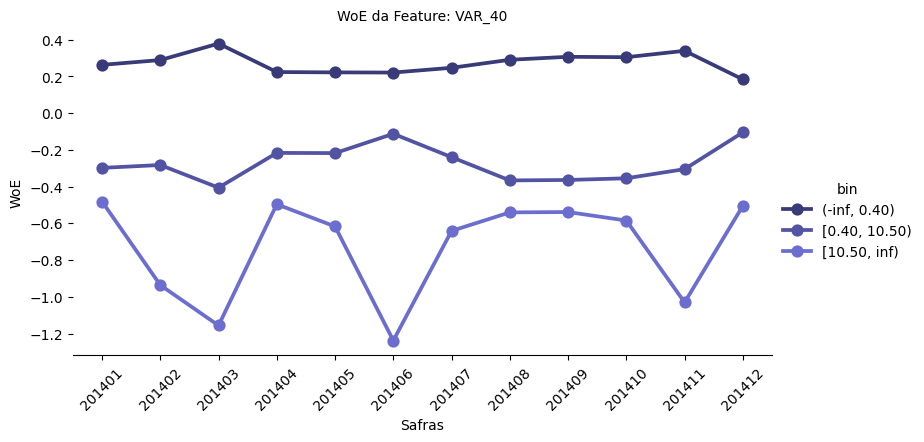

VAR_57


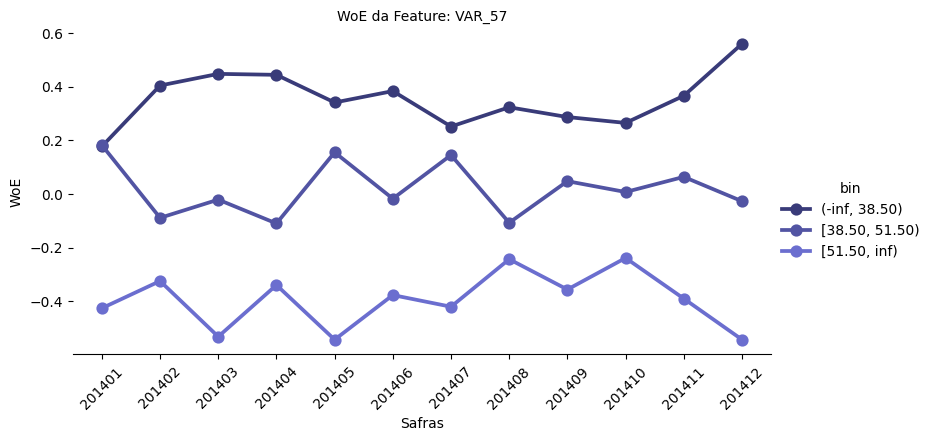

VAR_6


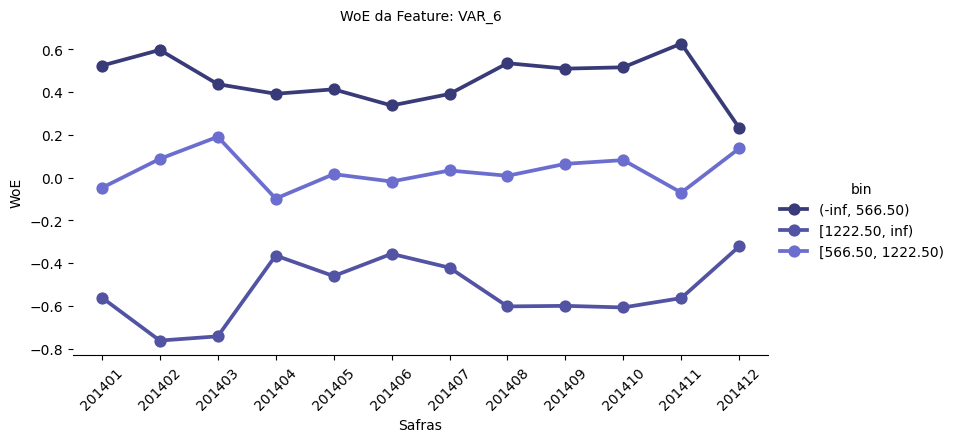

VAR_12_is_null


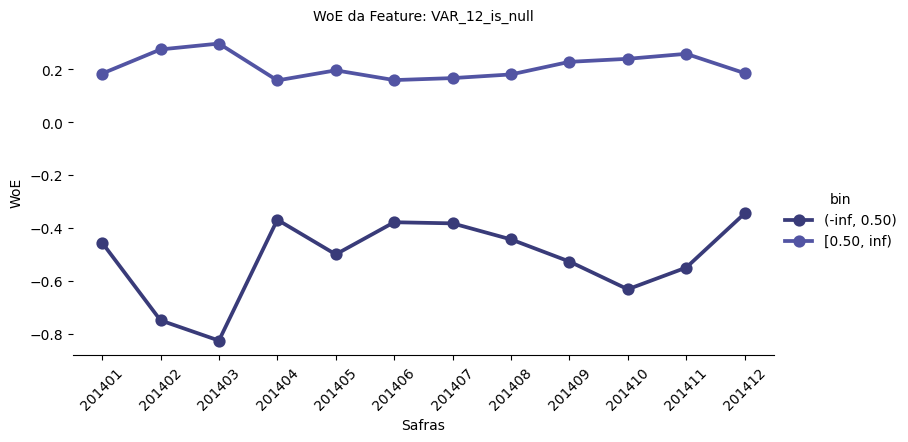

VAR_64


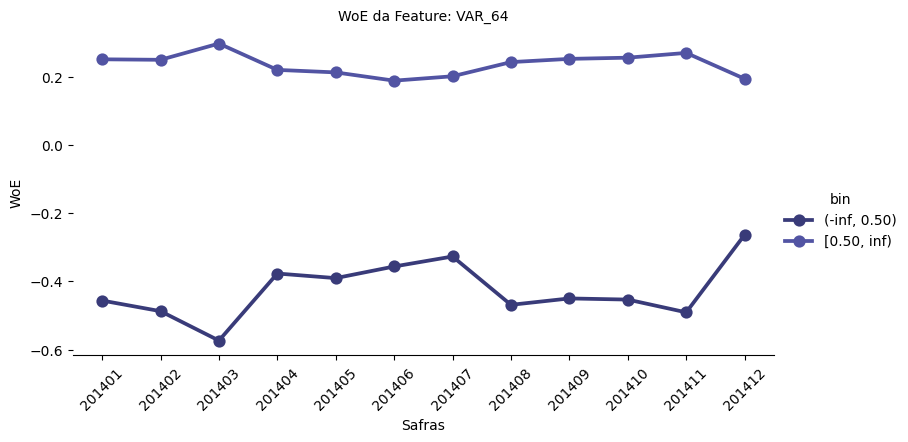

VAR_1


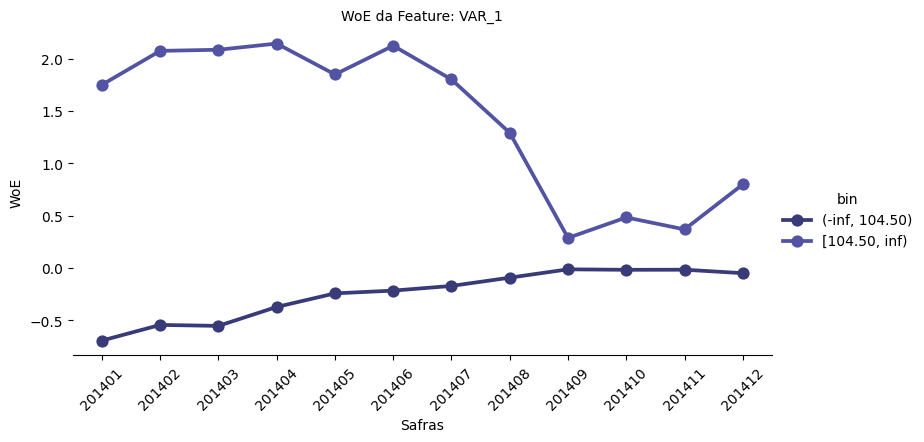

VAR_9


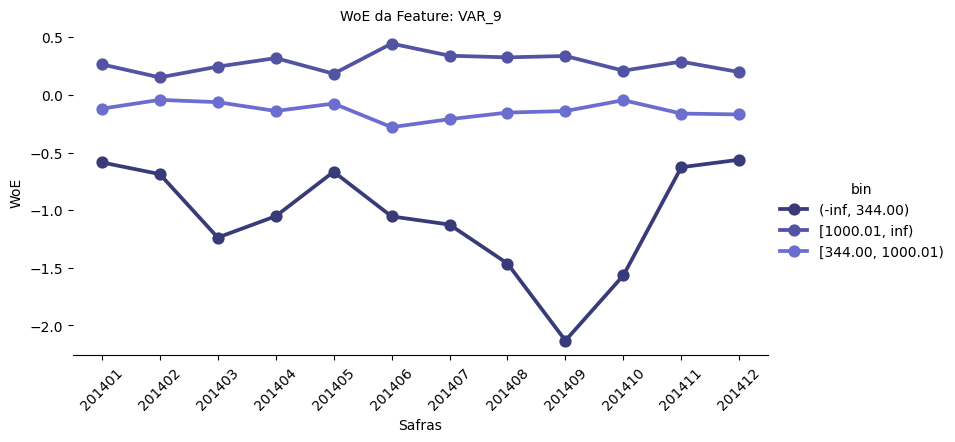

VAR_30


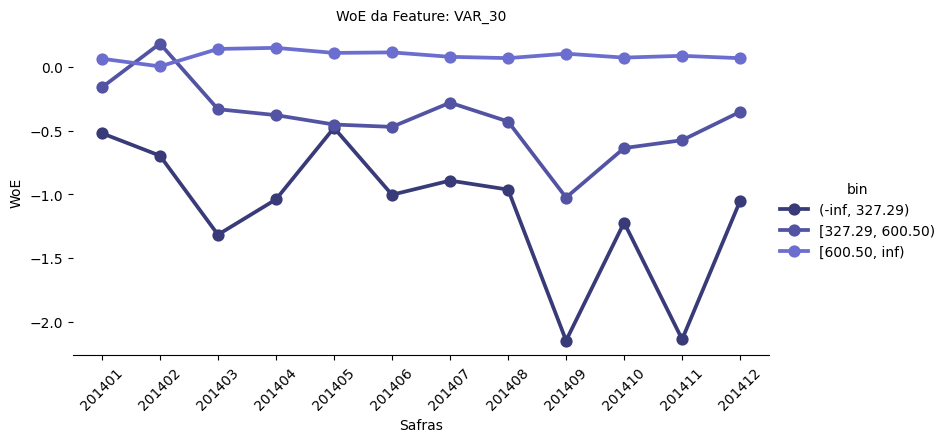

VAR_25


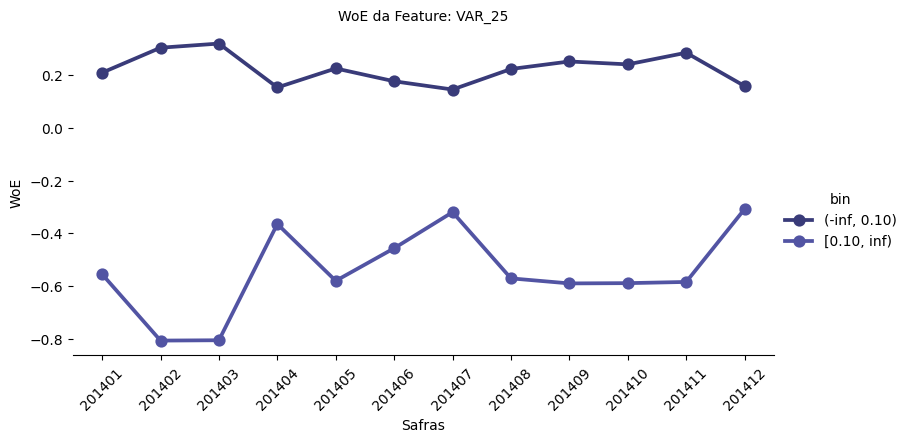

VAR_31_is_null


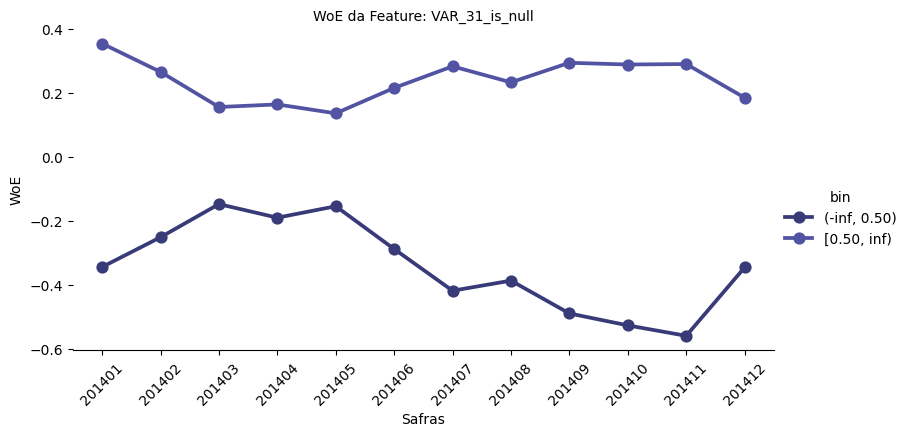

VAR_20


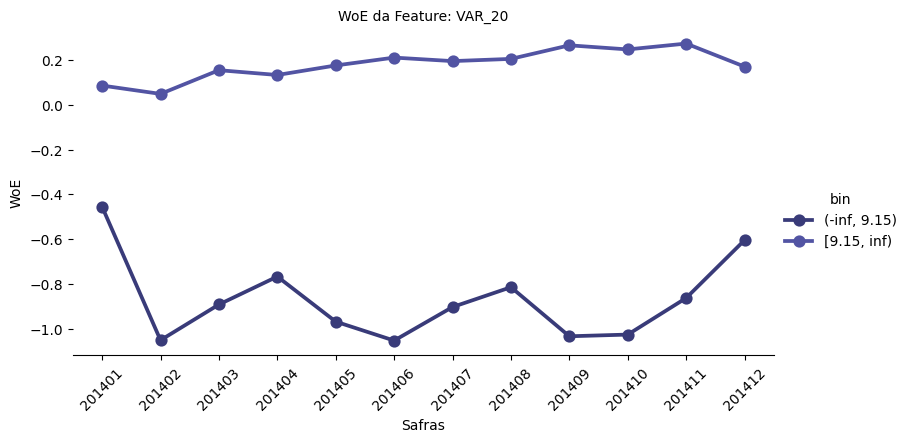

VAR_65


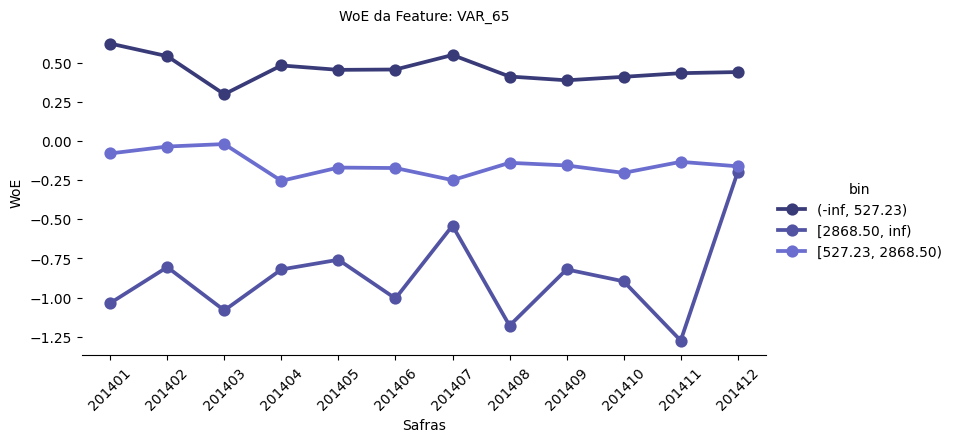

VAR_10_is_null


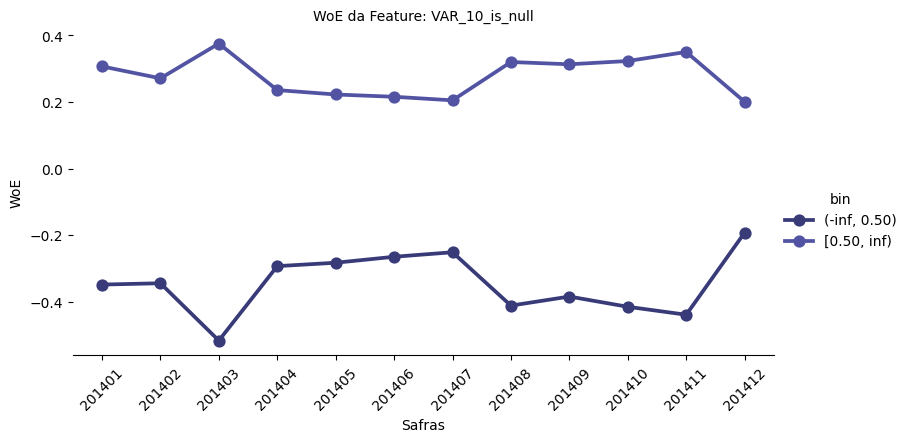

VAR_59


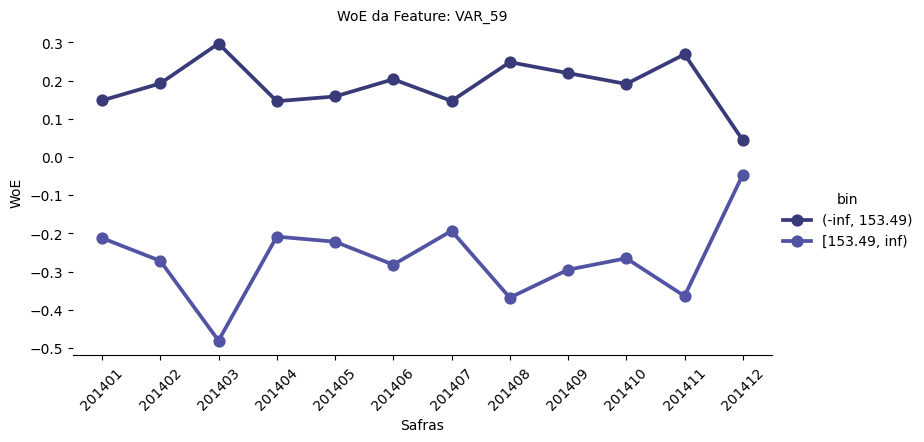

VAR_16_is_null


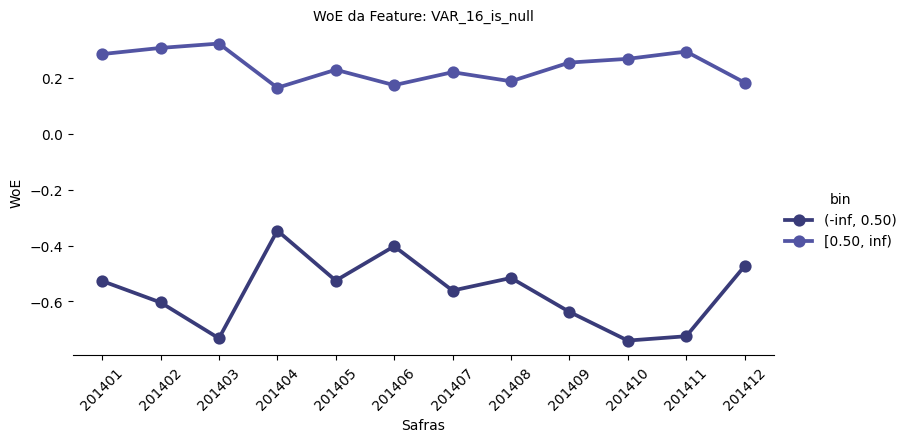

VAR_19


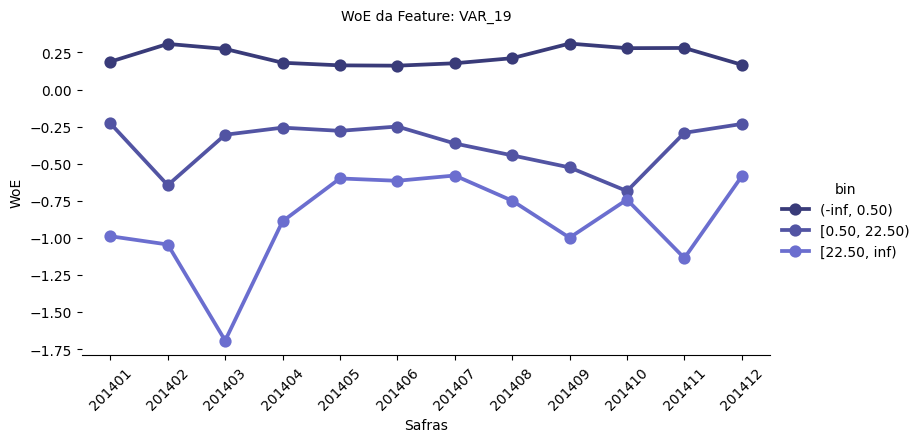

VAR_72


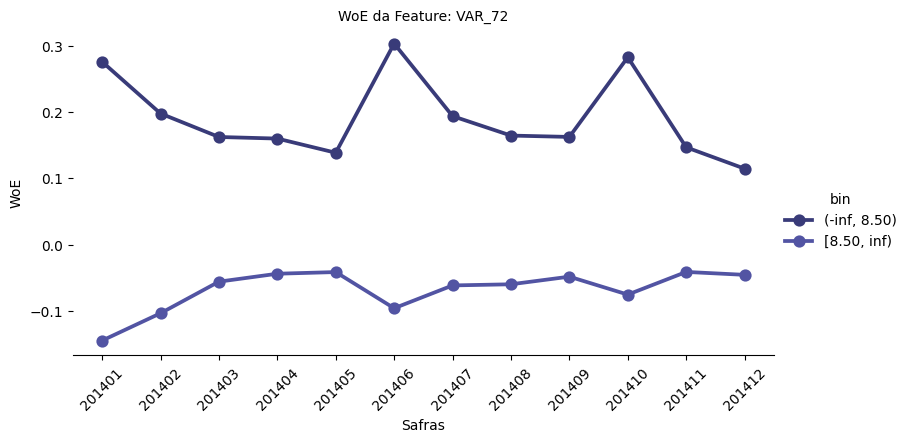

VAR_32


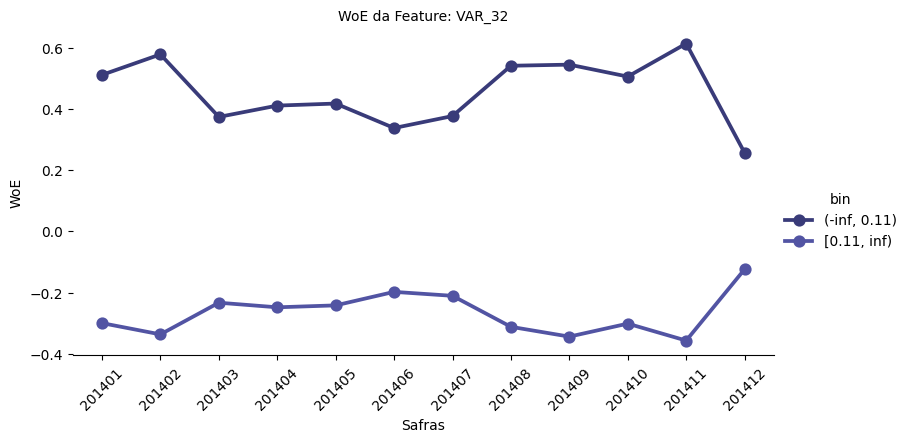

In [84]:
def create_graph_woe(df, feature):
    print(feature)
    ax = sns.catplot(x="safra", y="WoE", hue='bin', height=4, aspect=2,
                 capsize=.2, kind="point", data=df[df['Variable']==feature], palette = "tab20b")
            
    ax.set(xlabel = 'Safras', ylabel = 'WoE')
    # plt.legend(title='Bin', loc='upper right', bbox_to_anchor=(1.2, 0.9))
    plt.title(f"WoE da Feature: {feature}", fontsize=10)
    ax.despine(left=True)
    plt.xticks(rotation=45)
    # plt.ylim(-0.9, 1.2)
    plt.show()
    #ax.savefig(f'woe_{feature}.png')
    
    
for feature in list_features:
    df_tmp = df_iv_woe_ref[df_iv_woe_ref['Variable']==feature]
    
    create_graph_woe(df_tmp, feature)

### Avaliando IV

VAR_40


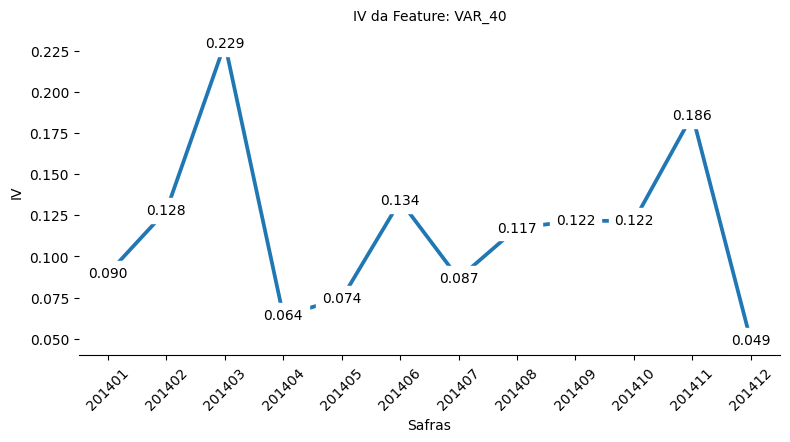

VAR_57


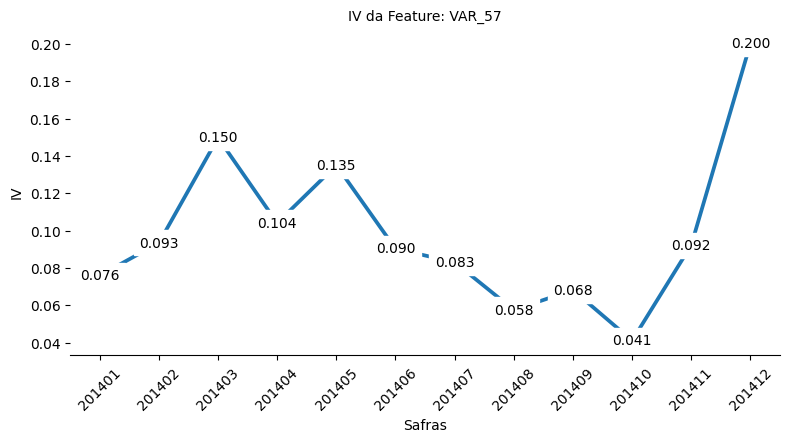

VAR_6


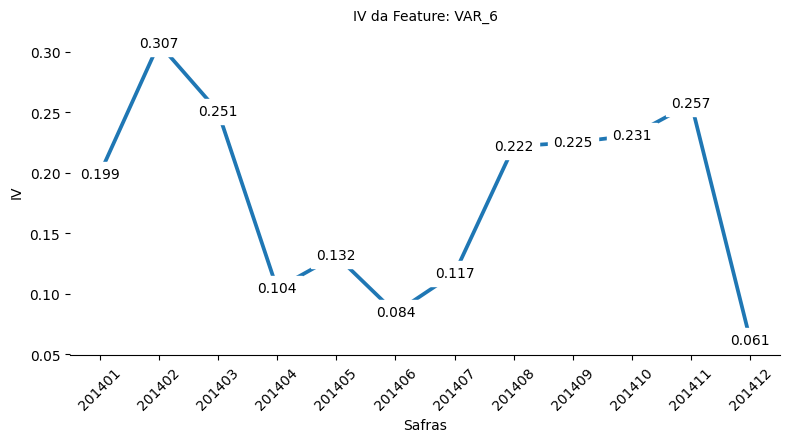

VAR_12_is_null


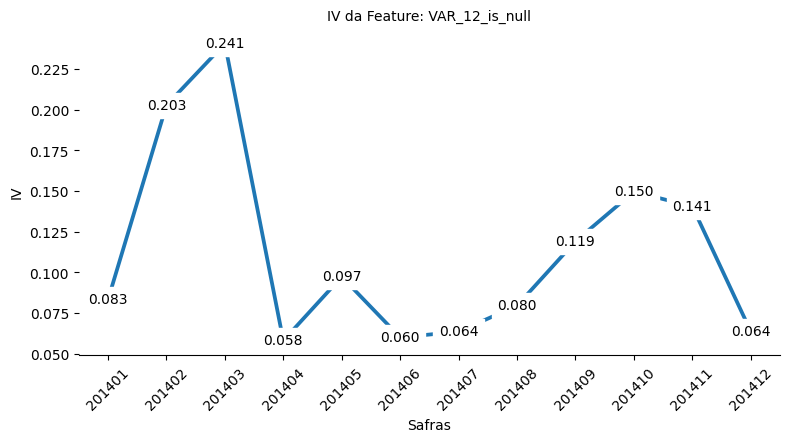

VAR_64


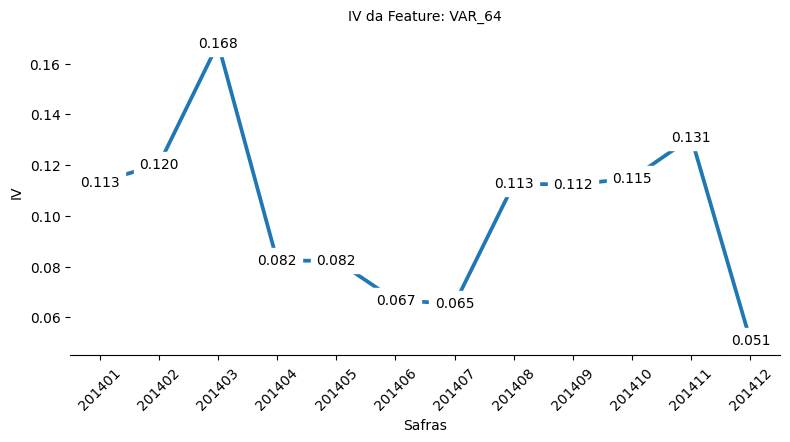

VAR_1


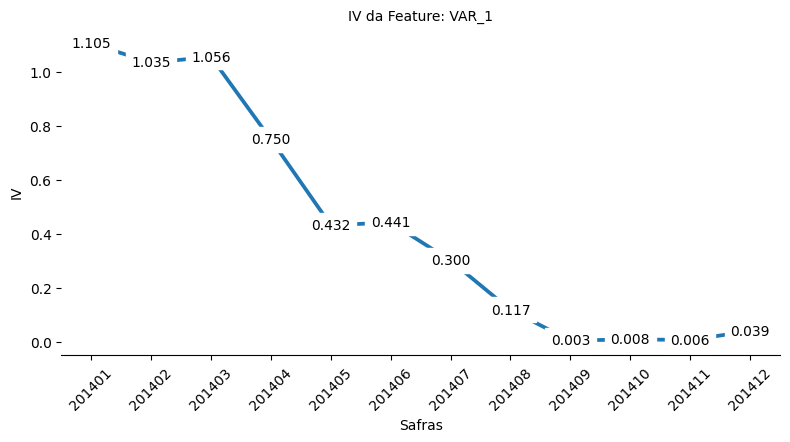

VAR_9


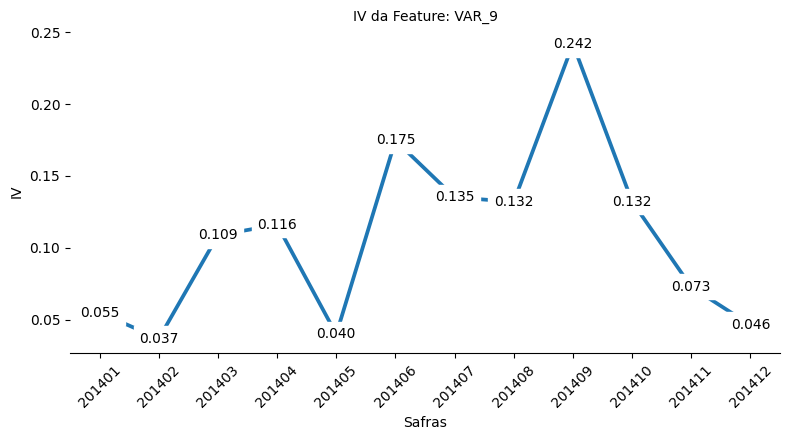

VAR_30


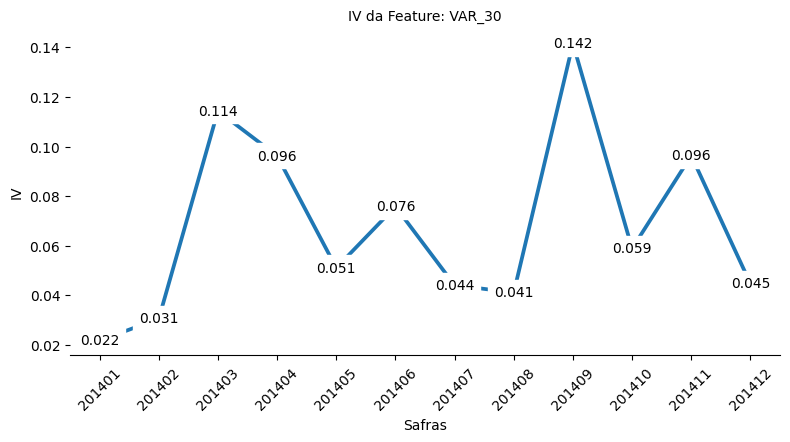

VAR_25


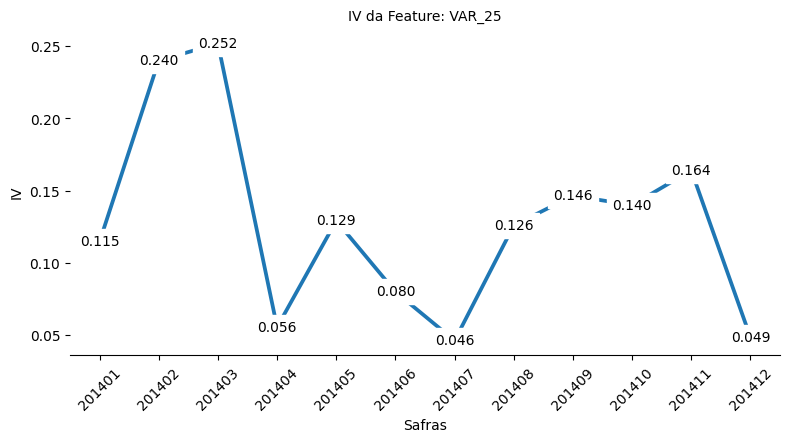

VAR_31_is_null


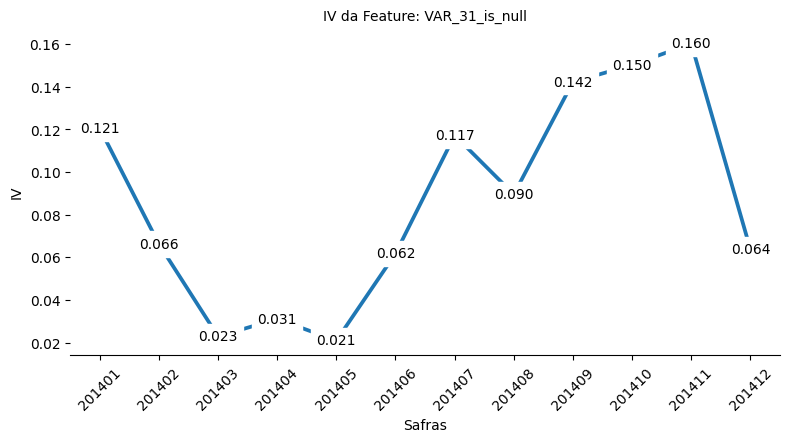

VAR_20


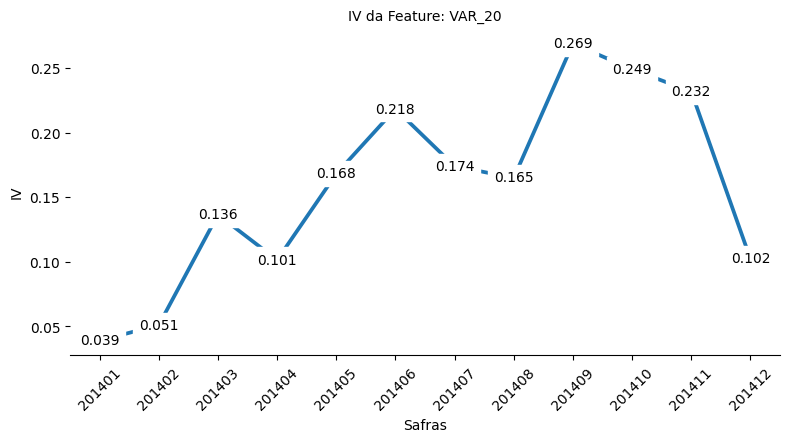

VAR_65


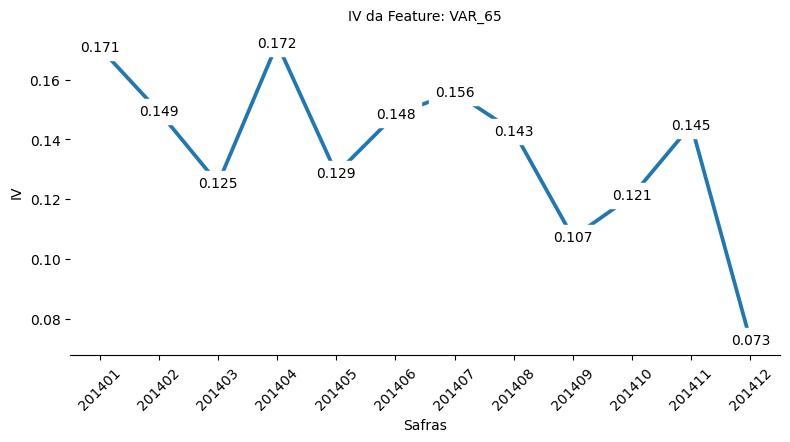

VAR_10_is_null


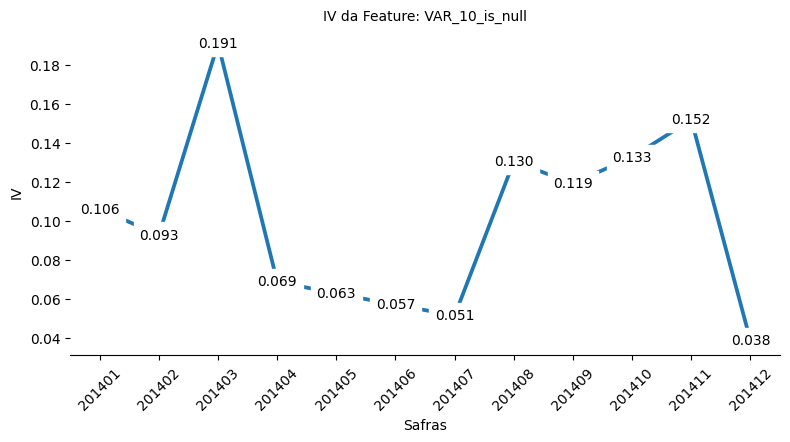

VAR_59


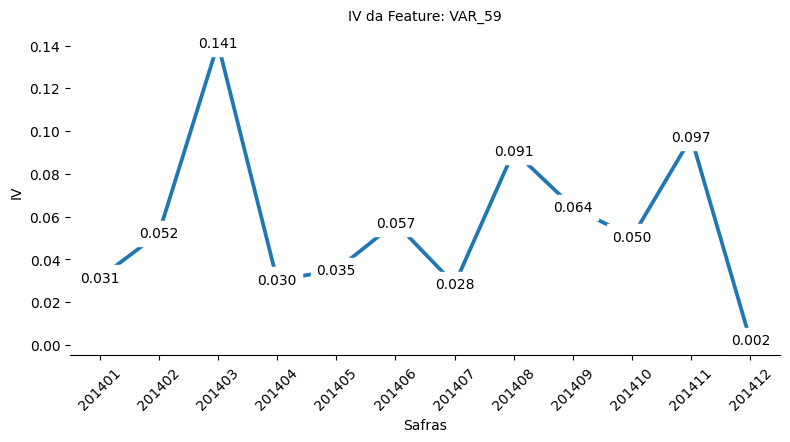

VAR_16_is_null


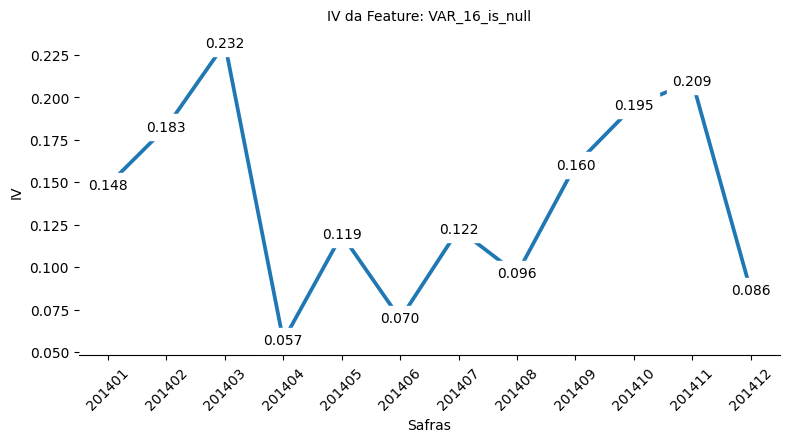

VAR_19


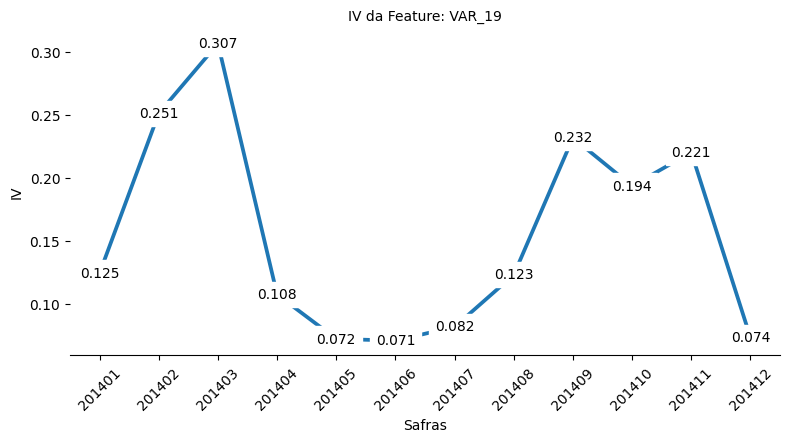

VAR_72


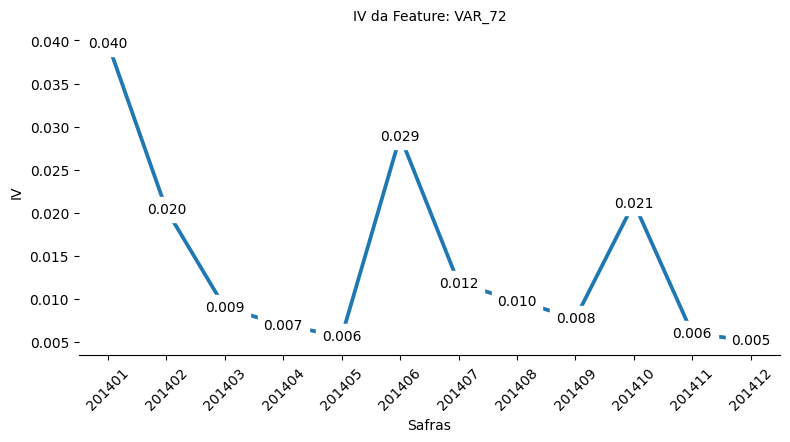

VAR_32


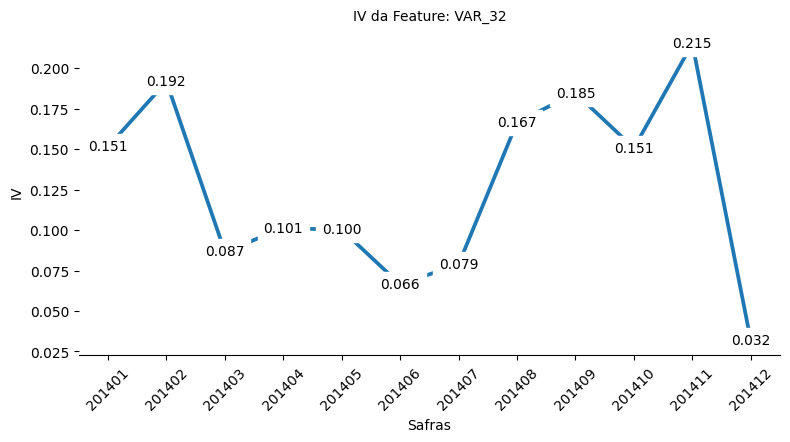

In [85]:
def create_graph_woe(df, feature):
    print(feature)
    ax = sns.catplot(x="safra", y="IV_SUM", height=4, aspect=2, capsize=.2, kind="point", data=df, legend=False)
    
    for ind, safra in enumerate(list(sorted(set(df['safra'].values)))):
        value = df[df['safra']==safra]['IV_SUM'].values[0]
        ax.ax.text(ind, value, f'{value:.3f}', backgroundcolor='white', color='black', ha='center', va='center')
    
    ax.set(xlabel = 'Safras', ylabel = 'IV')
    plt.title(f"IV da Feature: {feature}", fontsize=10)
    ax.despine(left=True)
    plt.xticks(rotation=45)
    # plt.ylim(-0.02, 0.70)
    plt.show()
    #ax.savefig(f'woe_{feature}.png')
    

df_iv_sum = df_iv_woe_ref.groupby(['safra', 'Variable']).agg(IV_SUM=('IV', 'sum')).reset_index()
    
for feature in list_features:
    df_tmp = df_iv_sum[df_iv_sum['Variable']==feature]
    
    create_graph_woe(df_tmp, feature)

### Avaliando Distribuição

In [86]:
def graph_distribution_bins(df, title):
    GROUP_QTD = df.pivot(index='safra', columns='bin', values='N')
    ax = (GROUP_QTD.T*100.0/GROUP_QTD.T.sum()).T.plot(kind='bar',figsize=(25,10),width=0.5,stacked=True, rot=0)
    
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x ,y = p.get_xy()
        ax.annotate('{:.2f}%'.format(height), (x + width/2, y + height*0.2), ha='center')
    
    ax.set_xlabel('Safras', fontsize=16)
    ax.set_ylabel('Quantidade  por bin', fontsize=16)
    plt.legend(title='Bins', loc='upper right', bbox_to_anchor=(1.0, 0.9), fontsize=12)
    plt.title(title, fontsize=18)
    plt.show() 

VAR_40


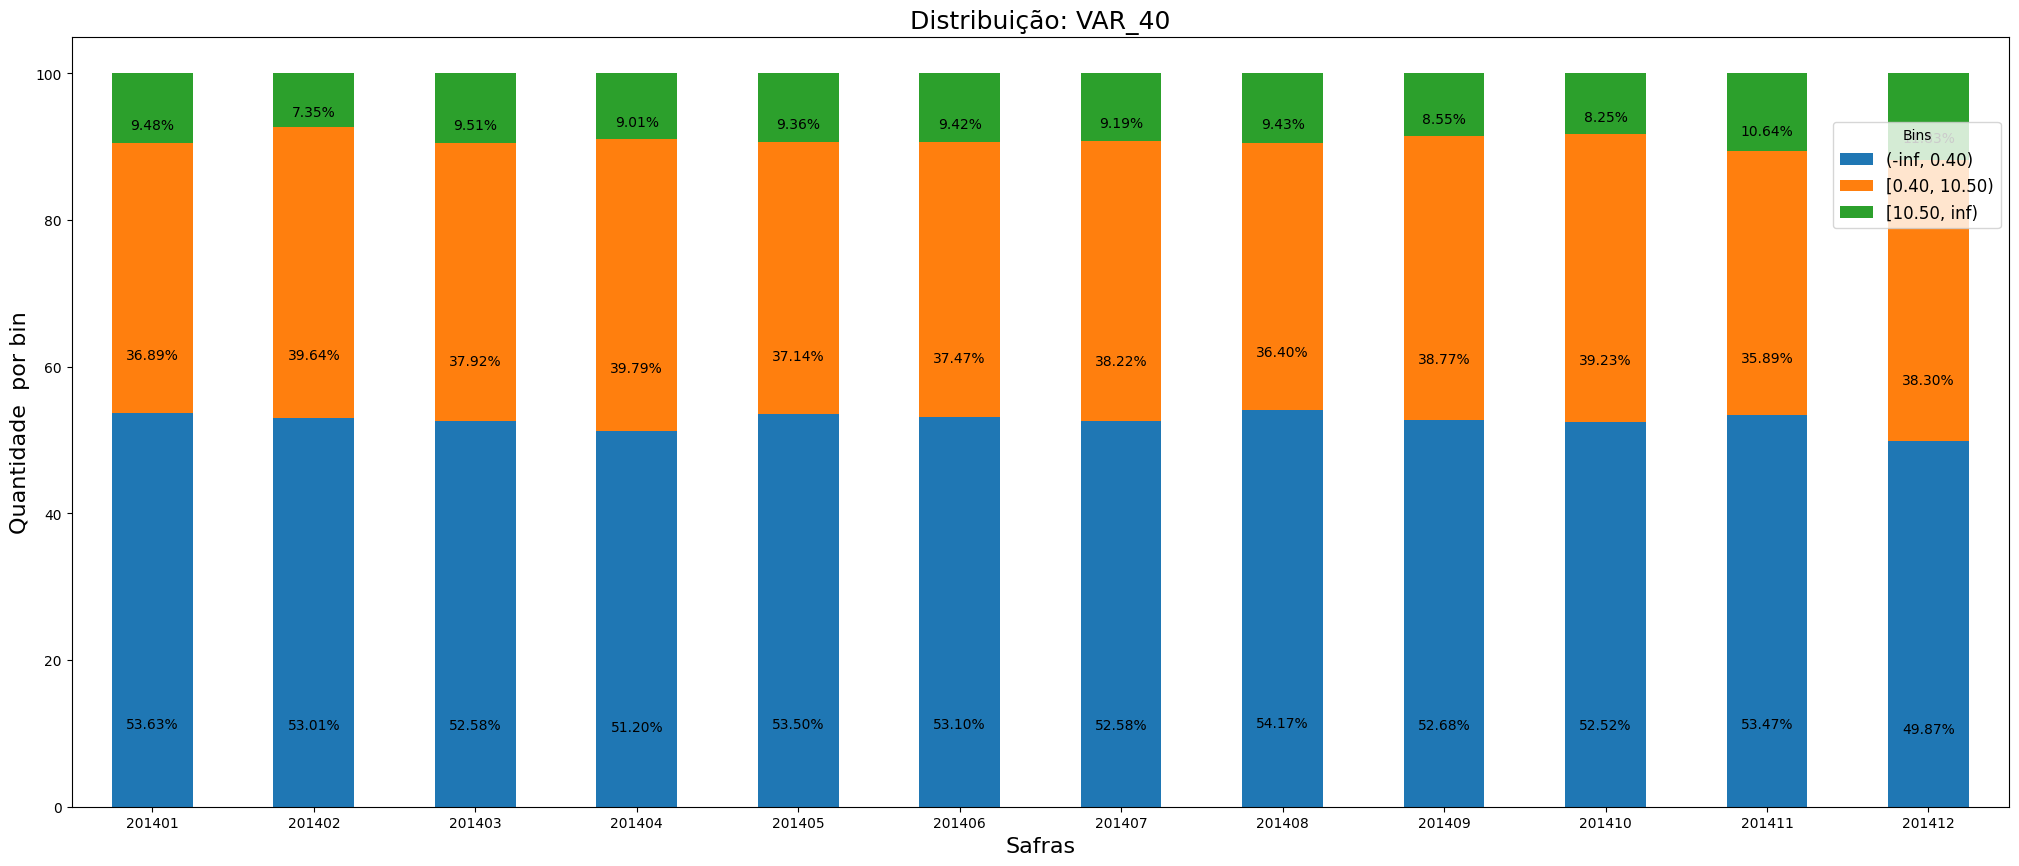

VAR_57


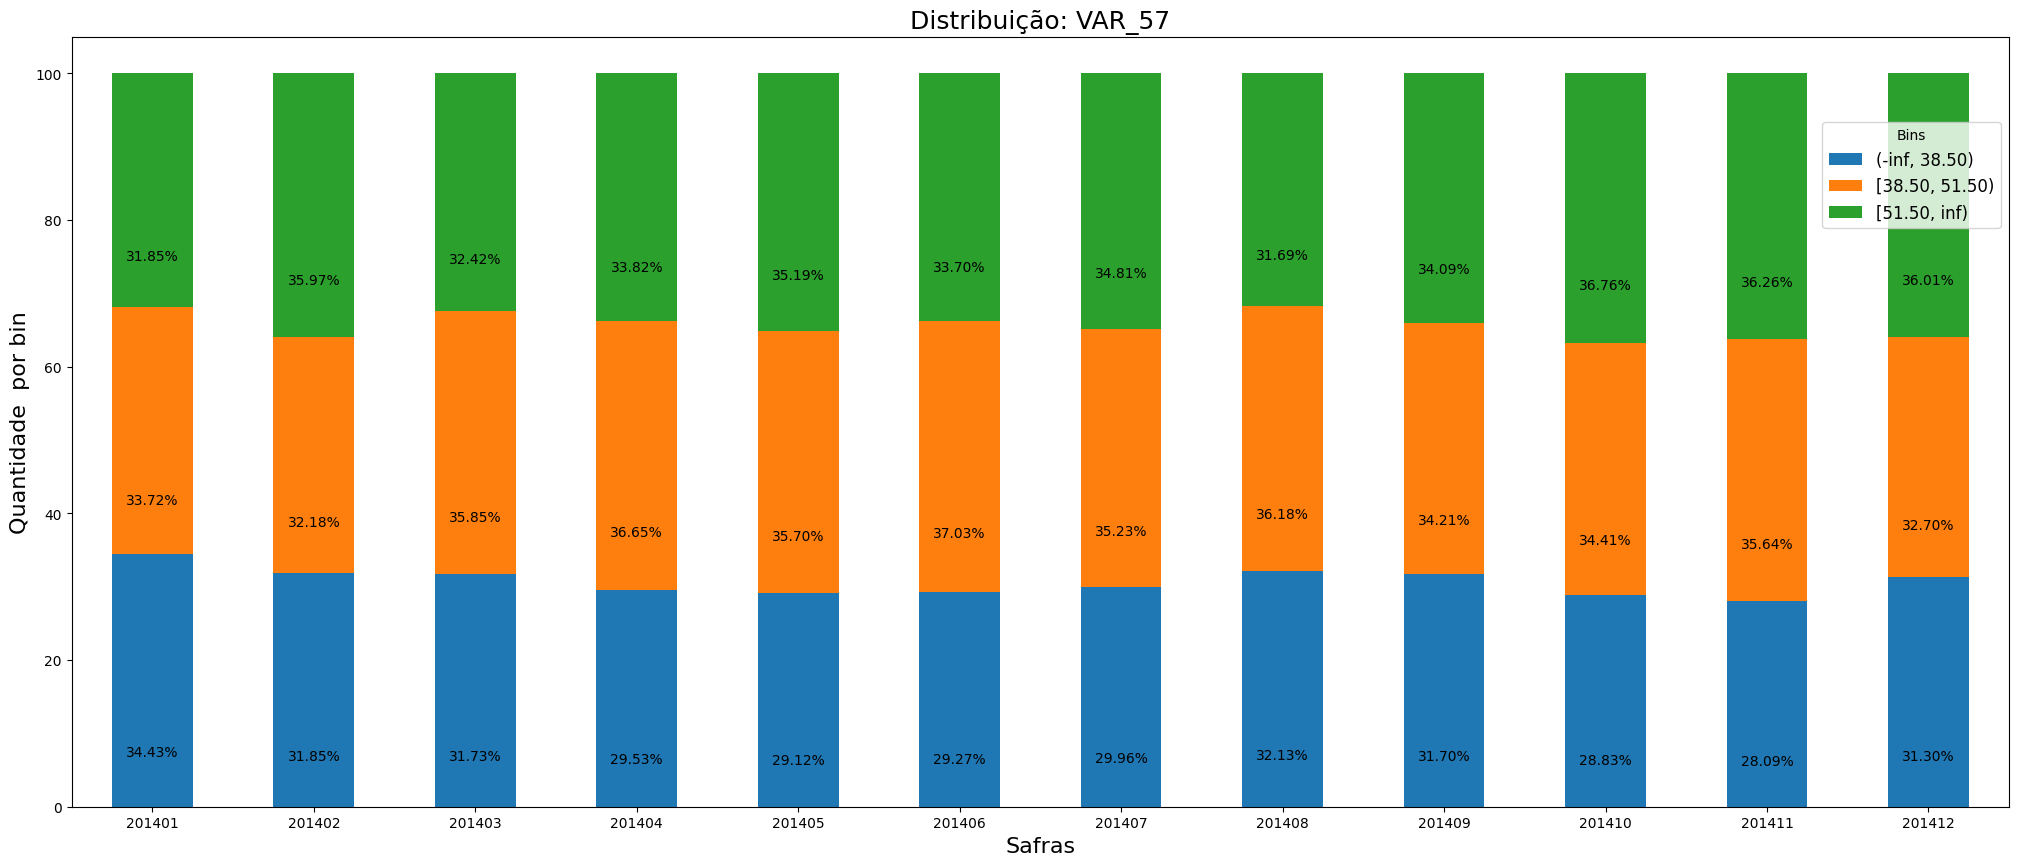

VAR_6


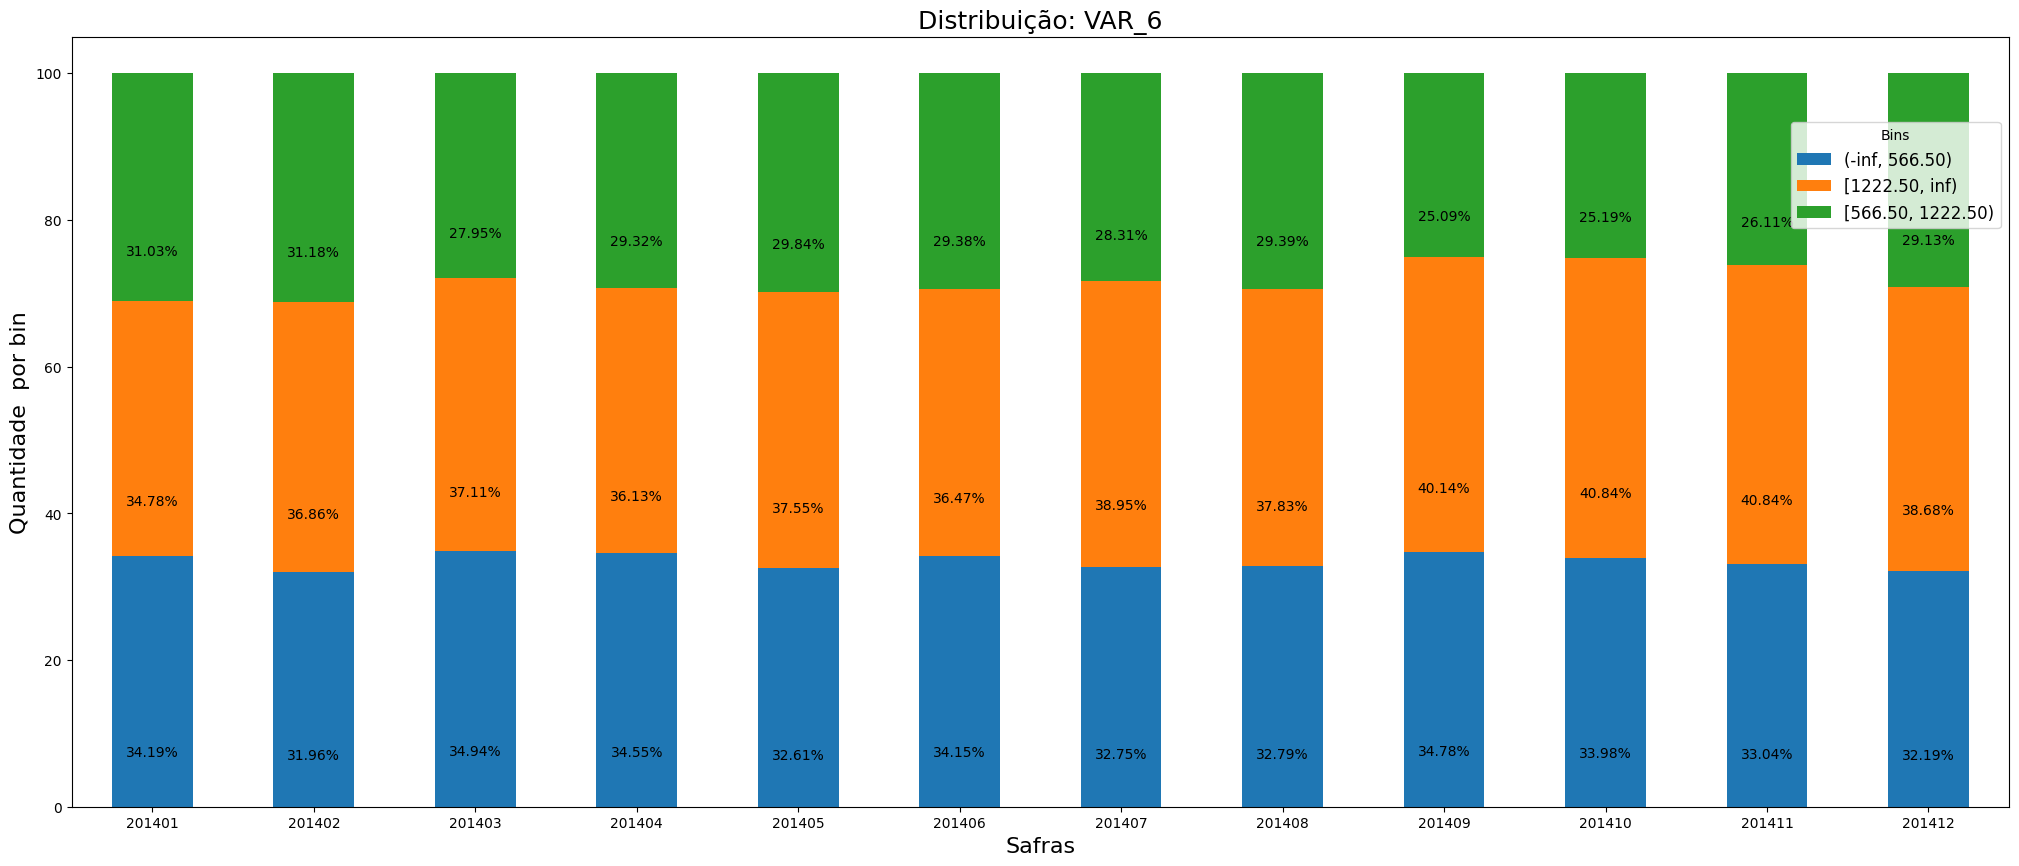

VAR_12_is_null


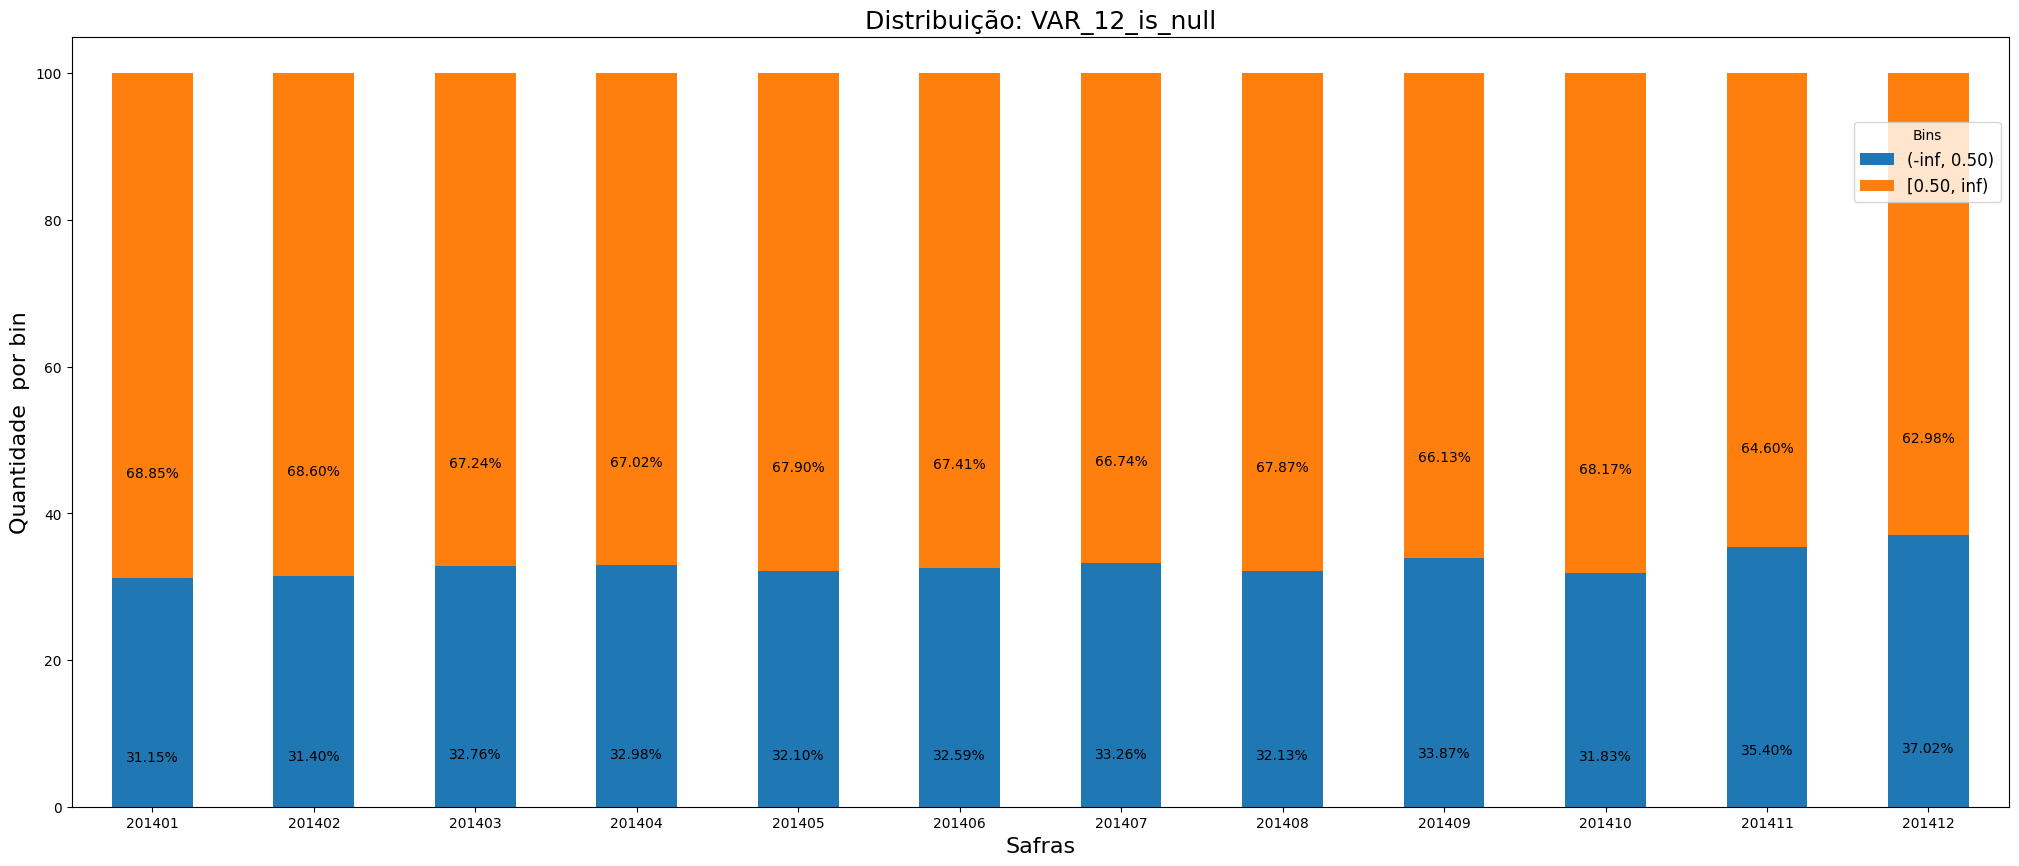

VAR_64


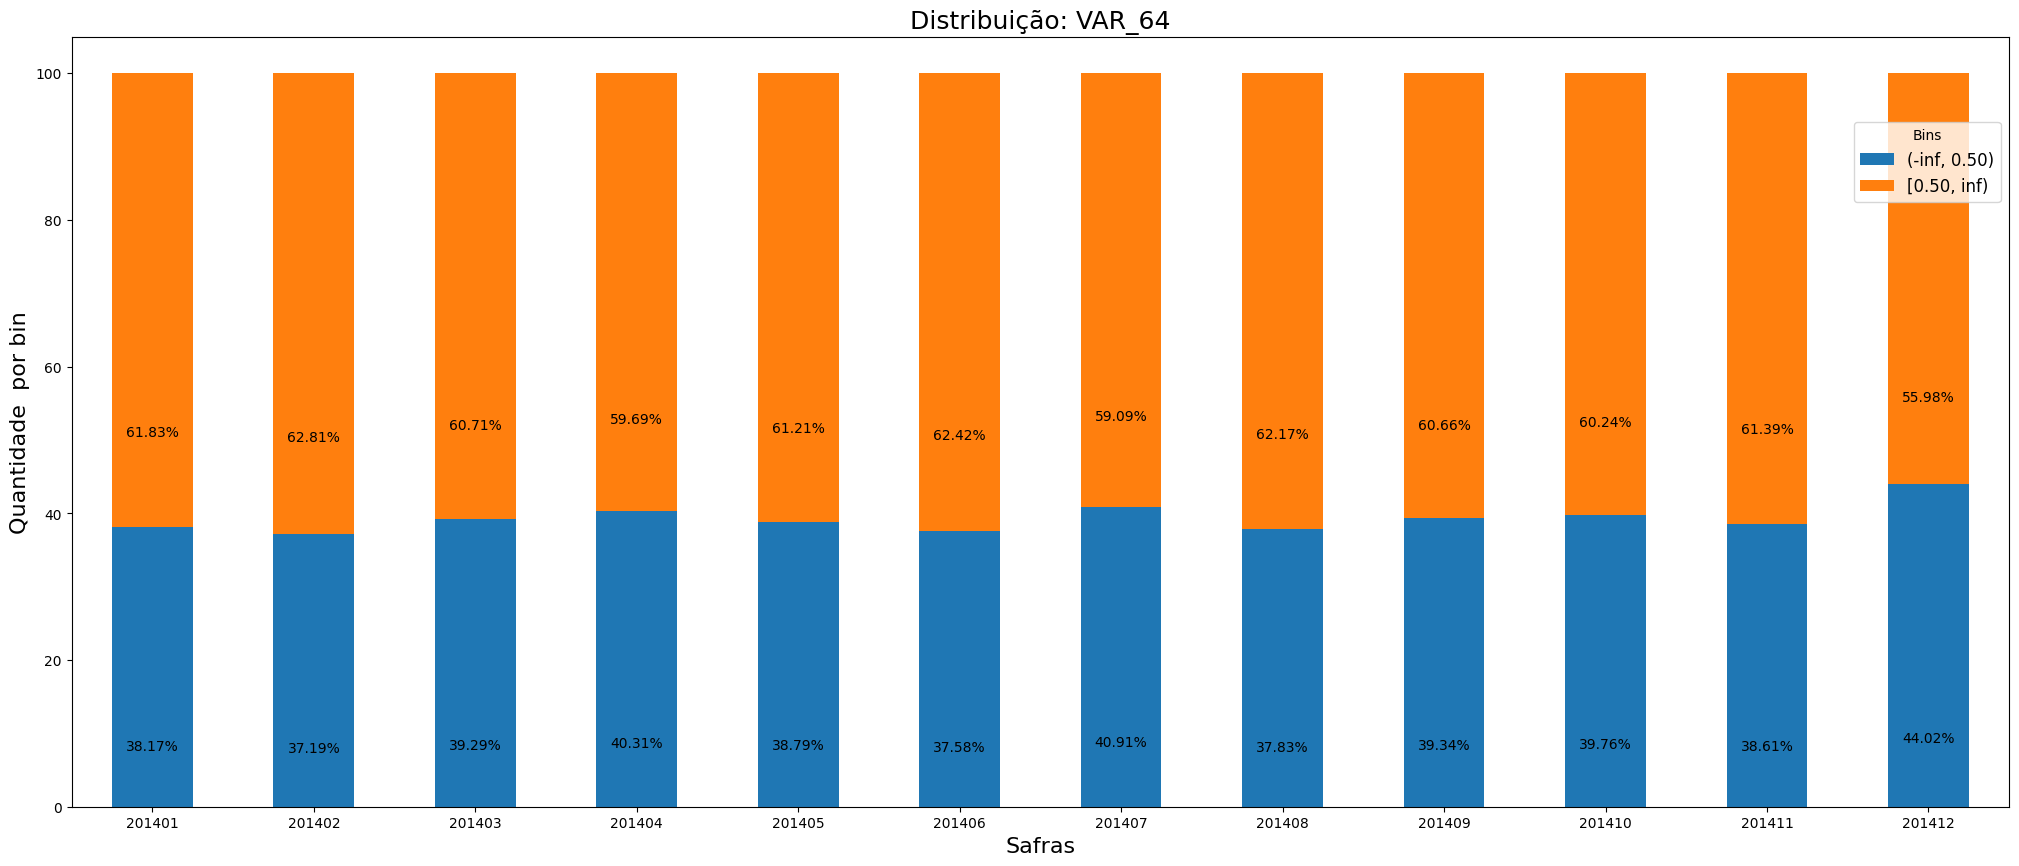

VAR_1


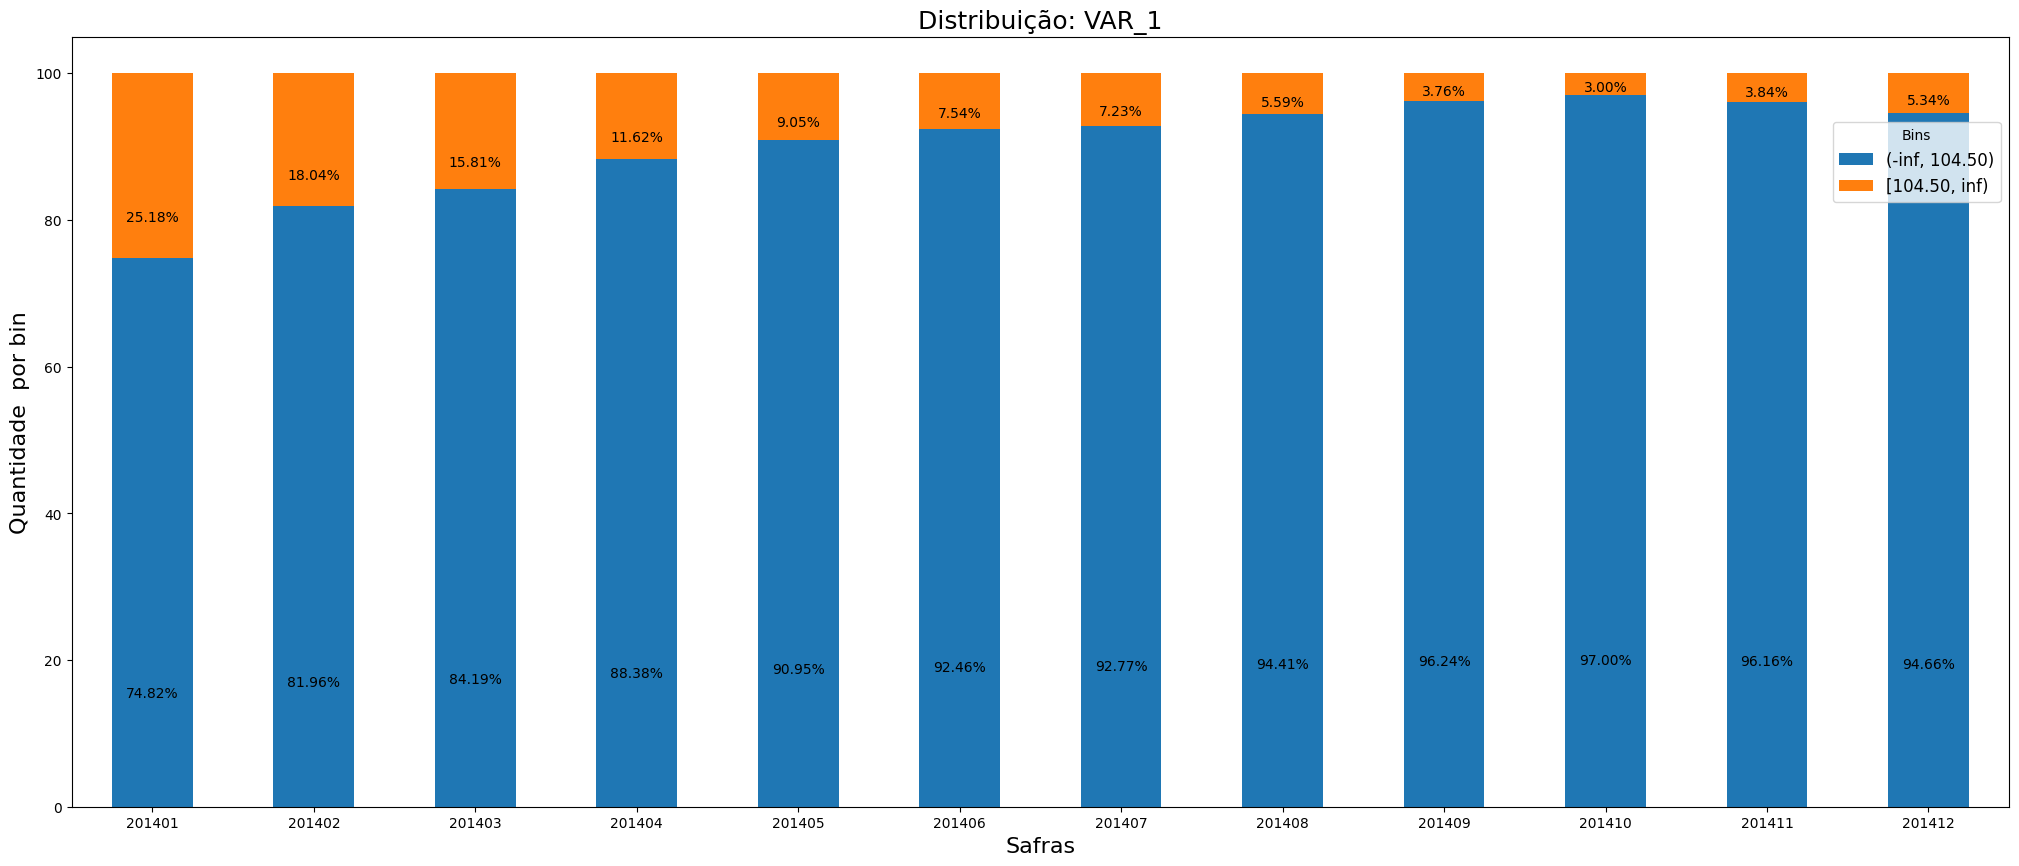

VAR_9


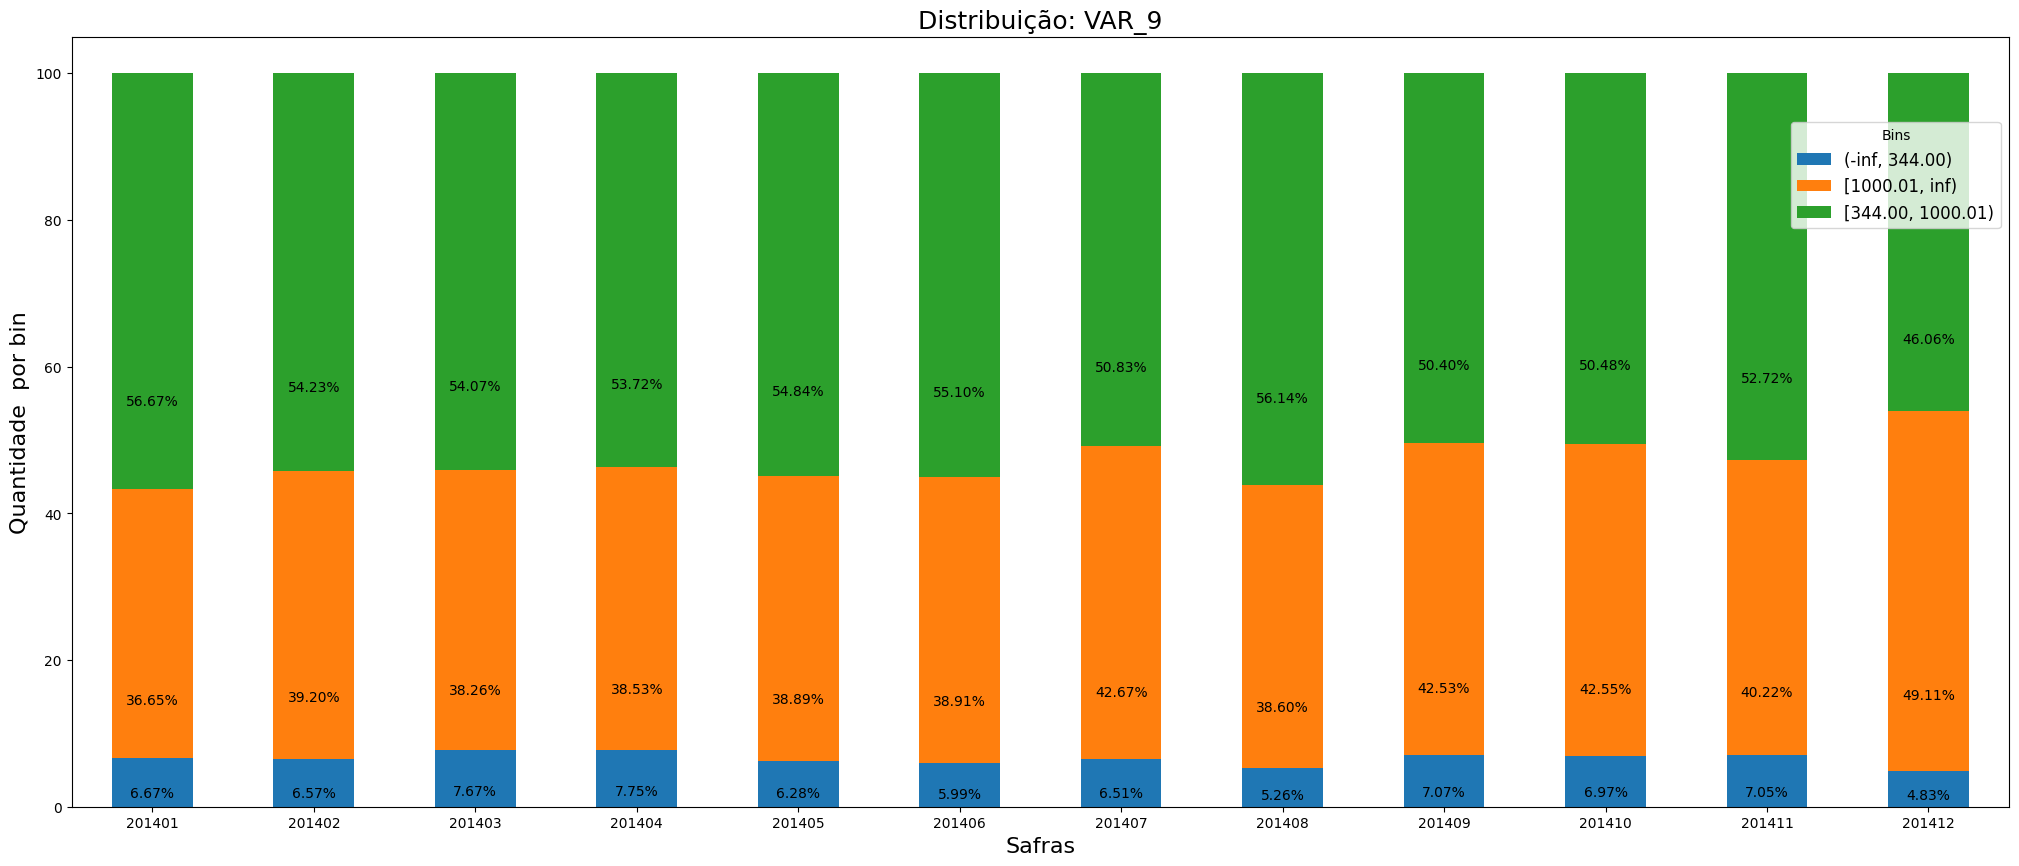

VAR_30


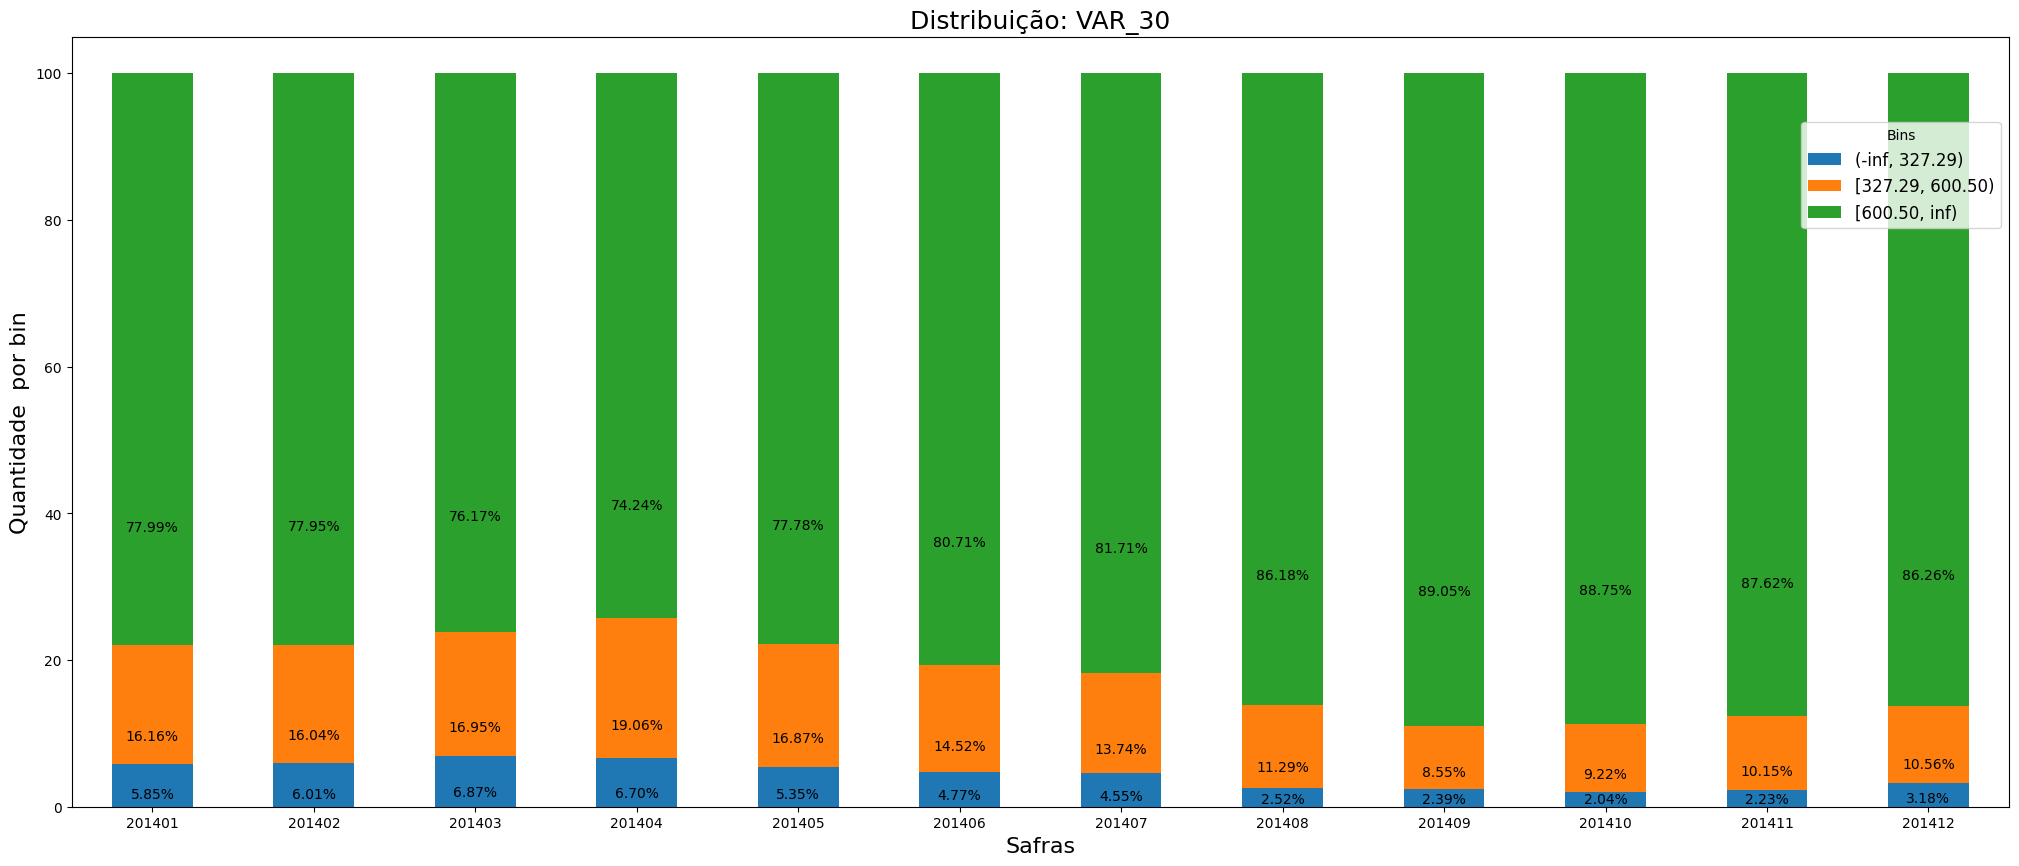

VAR_25


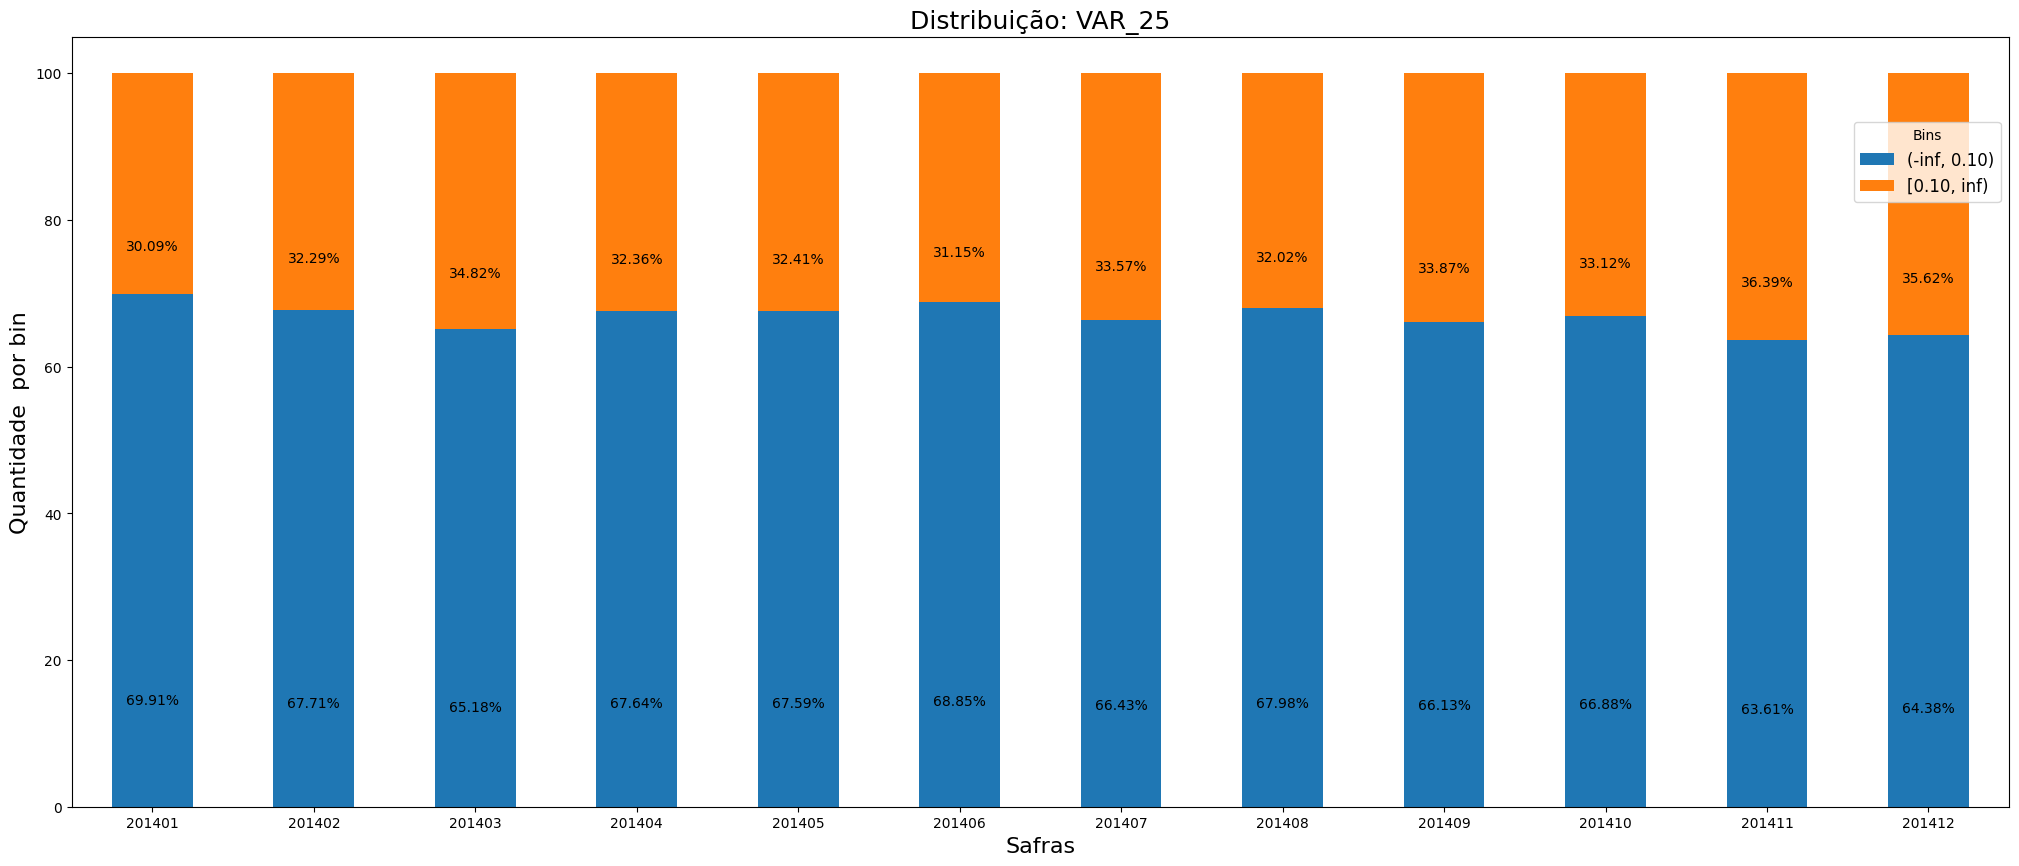

VAR_31_is_null


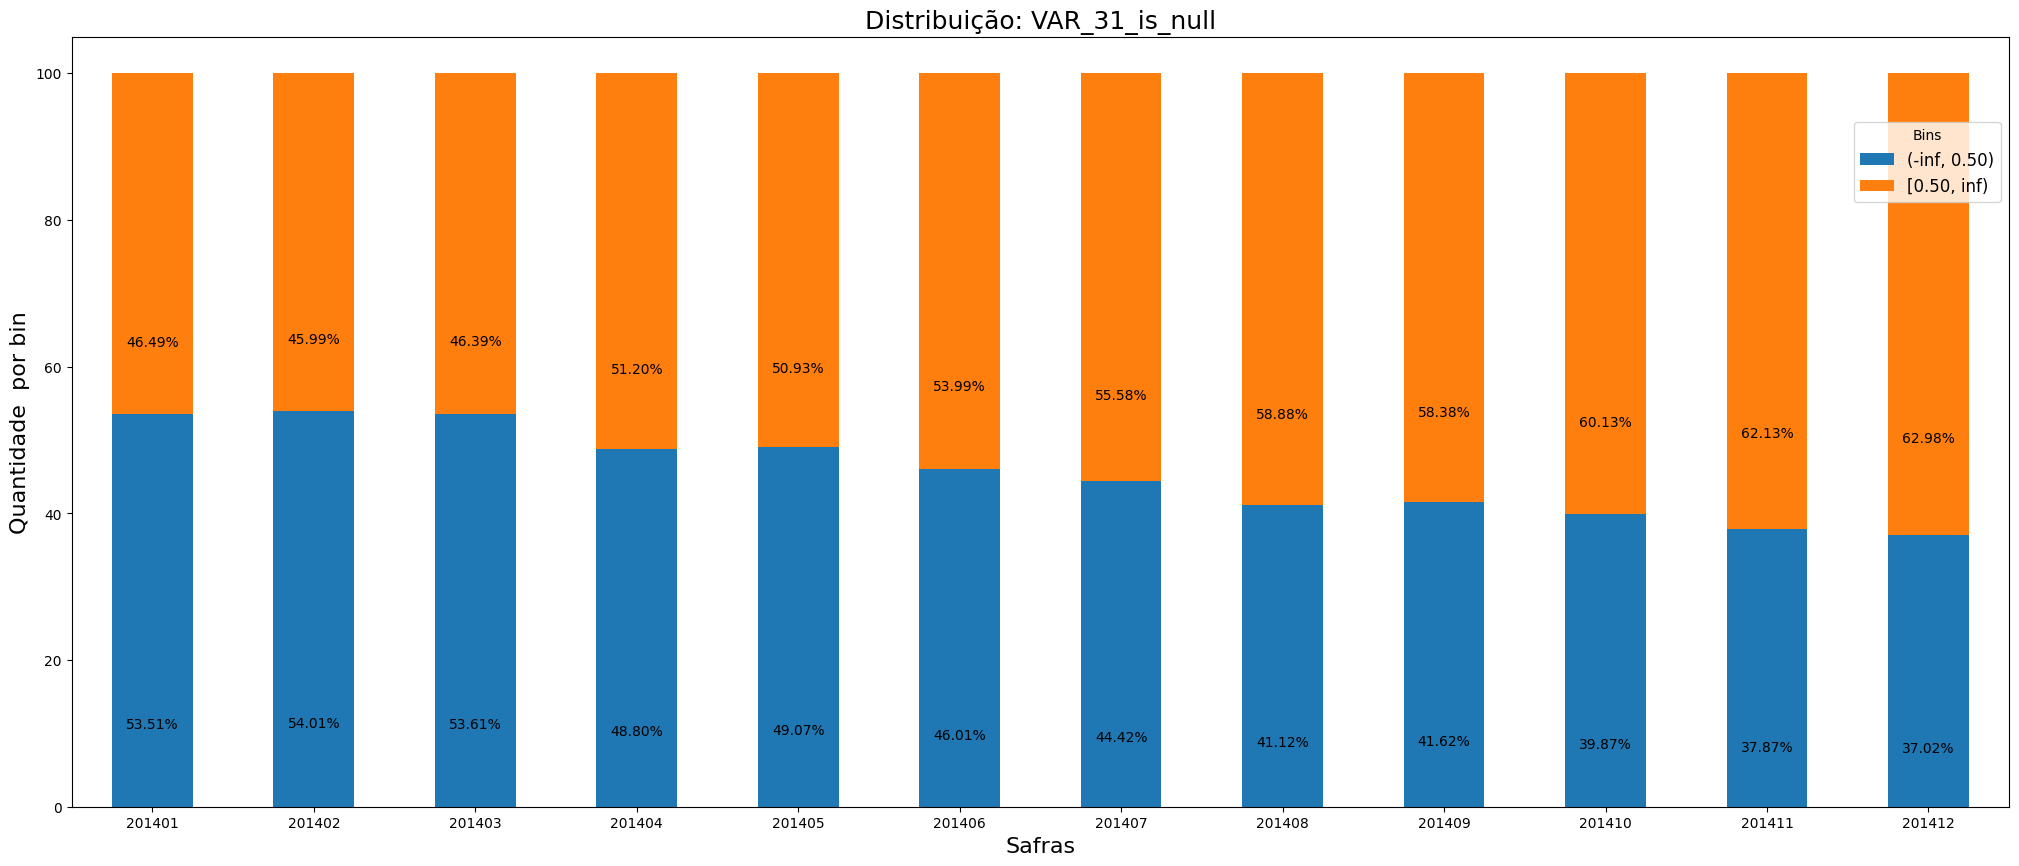

VAR_20


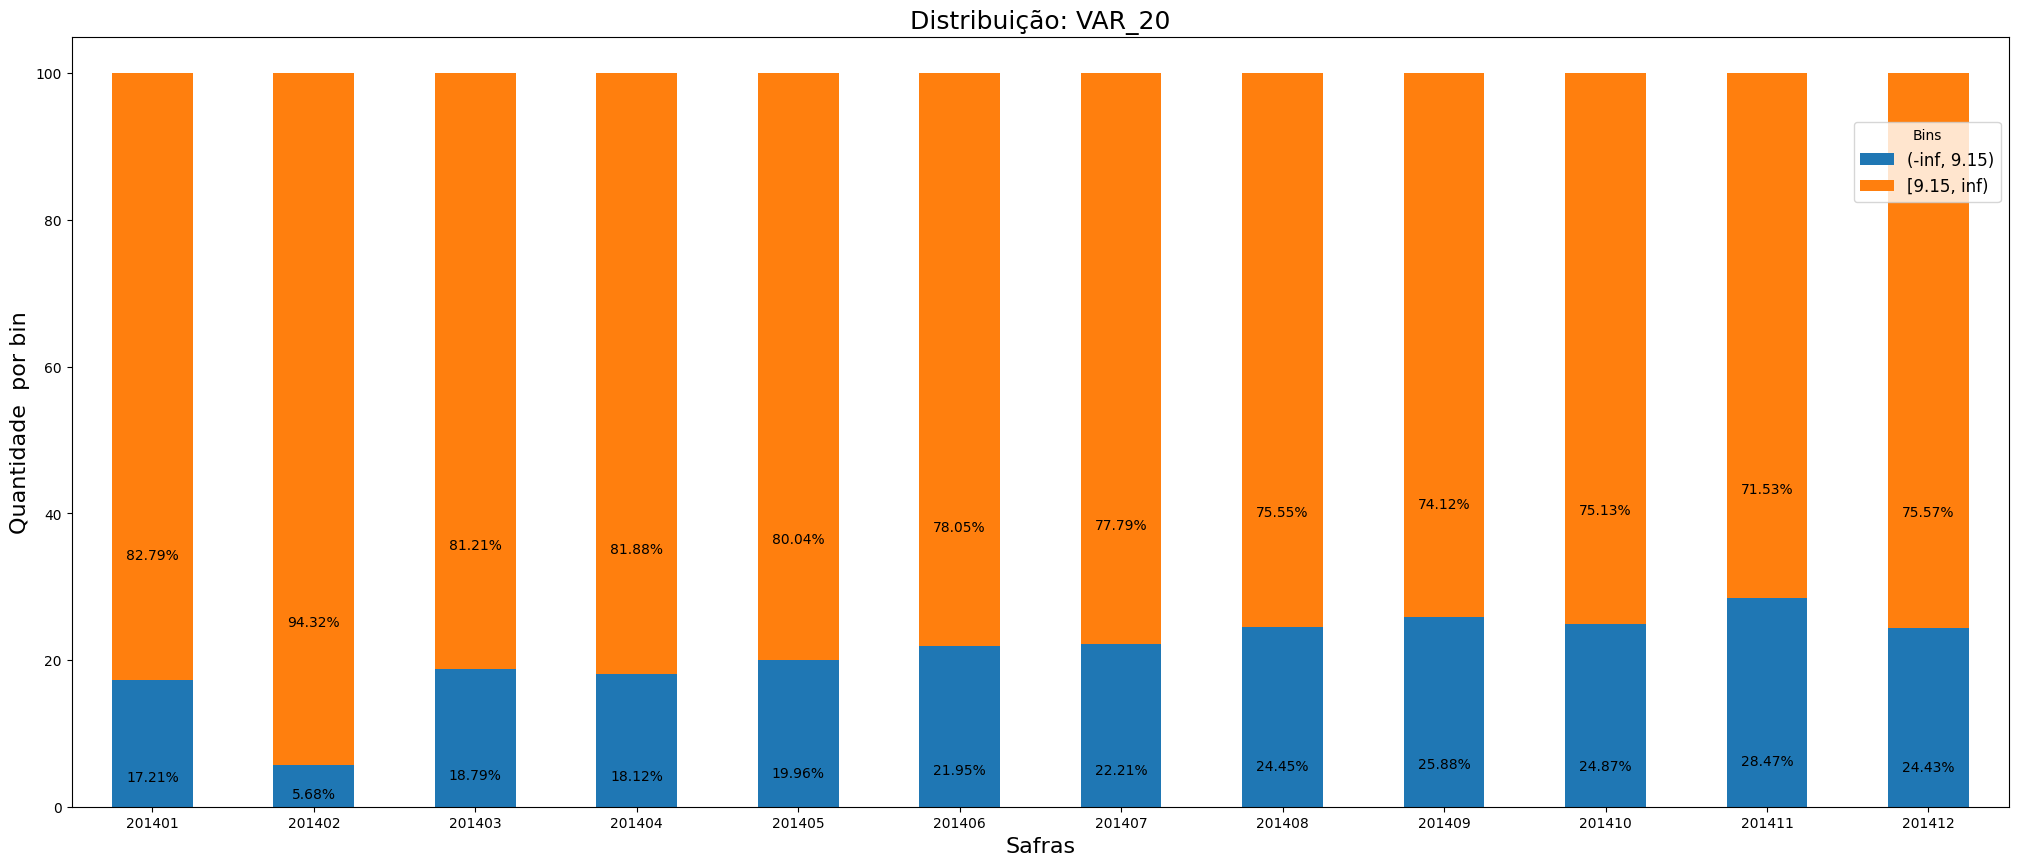

VAR_65


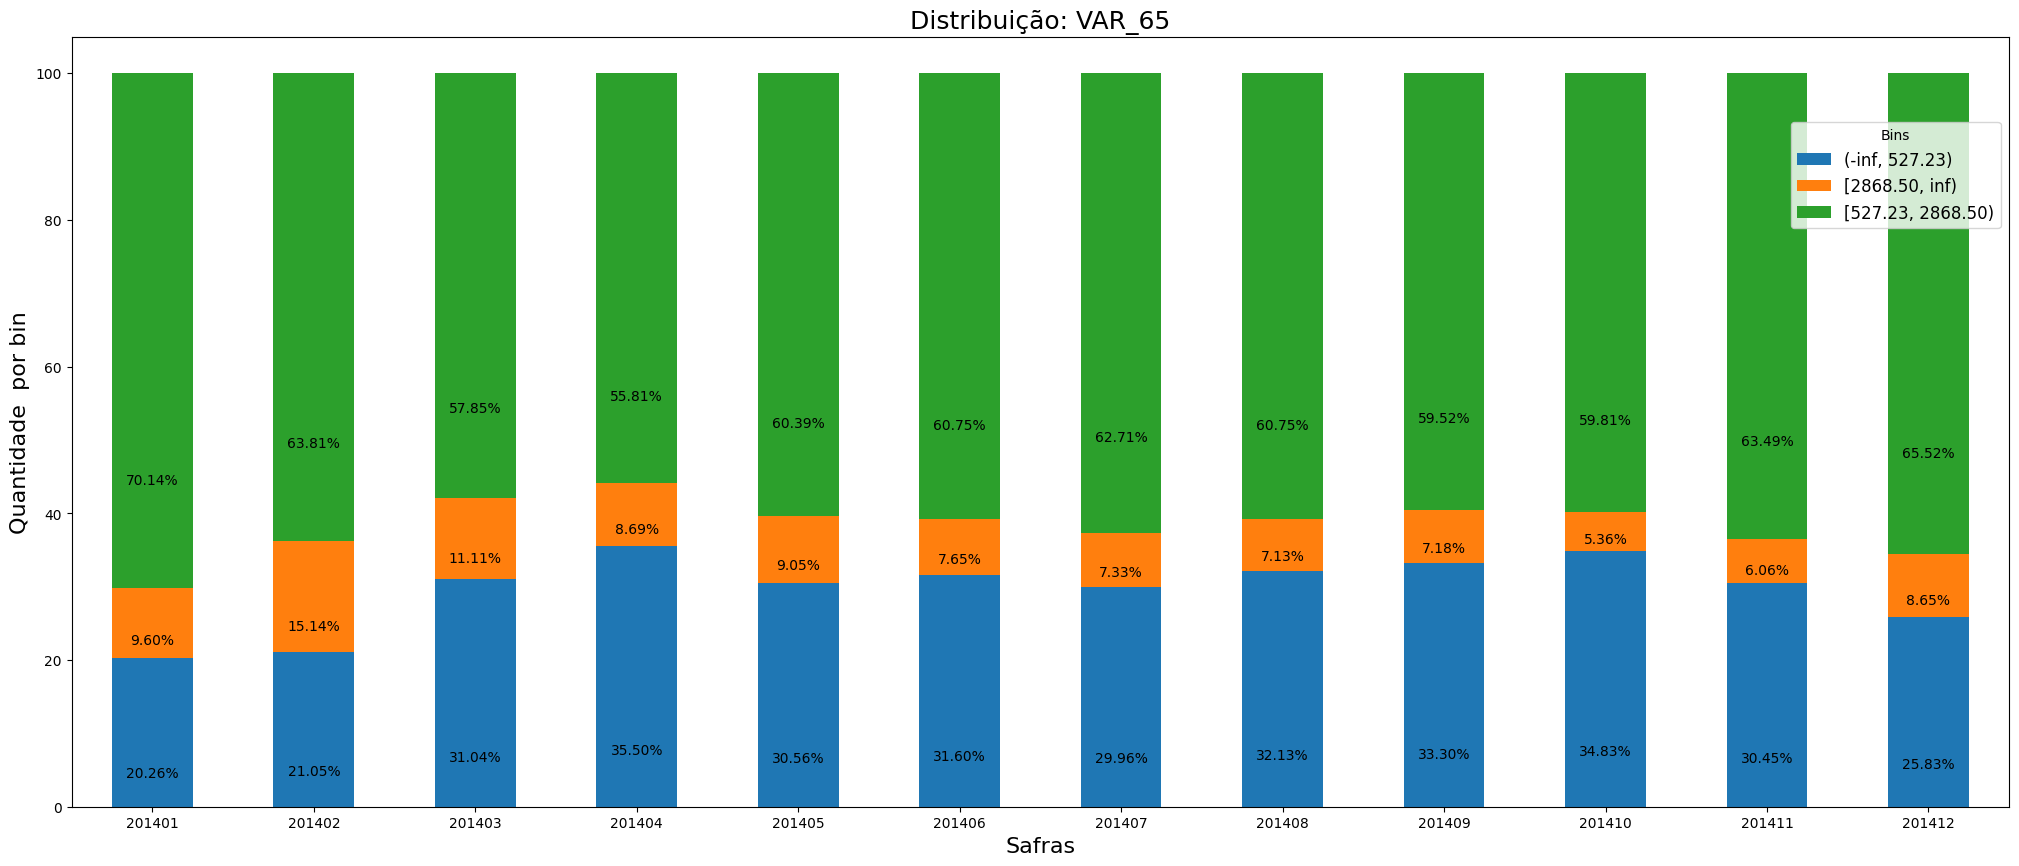

VAR_10_is_null


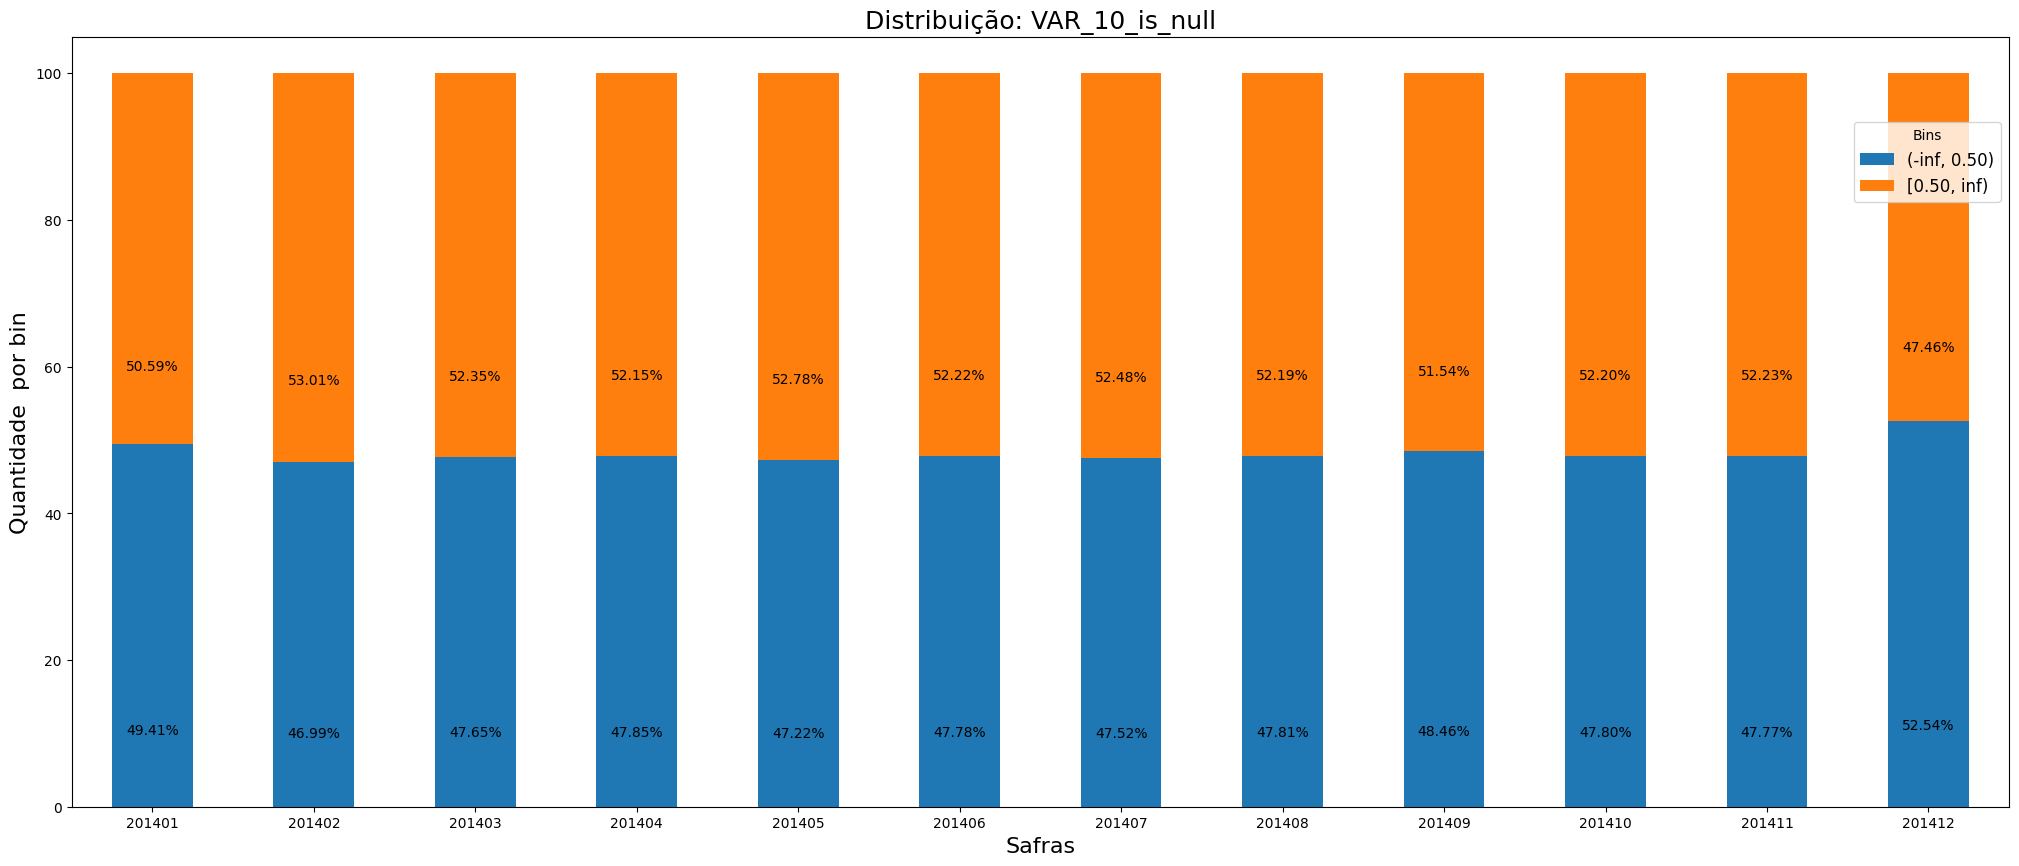

VAR_59


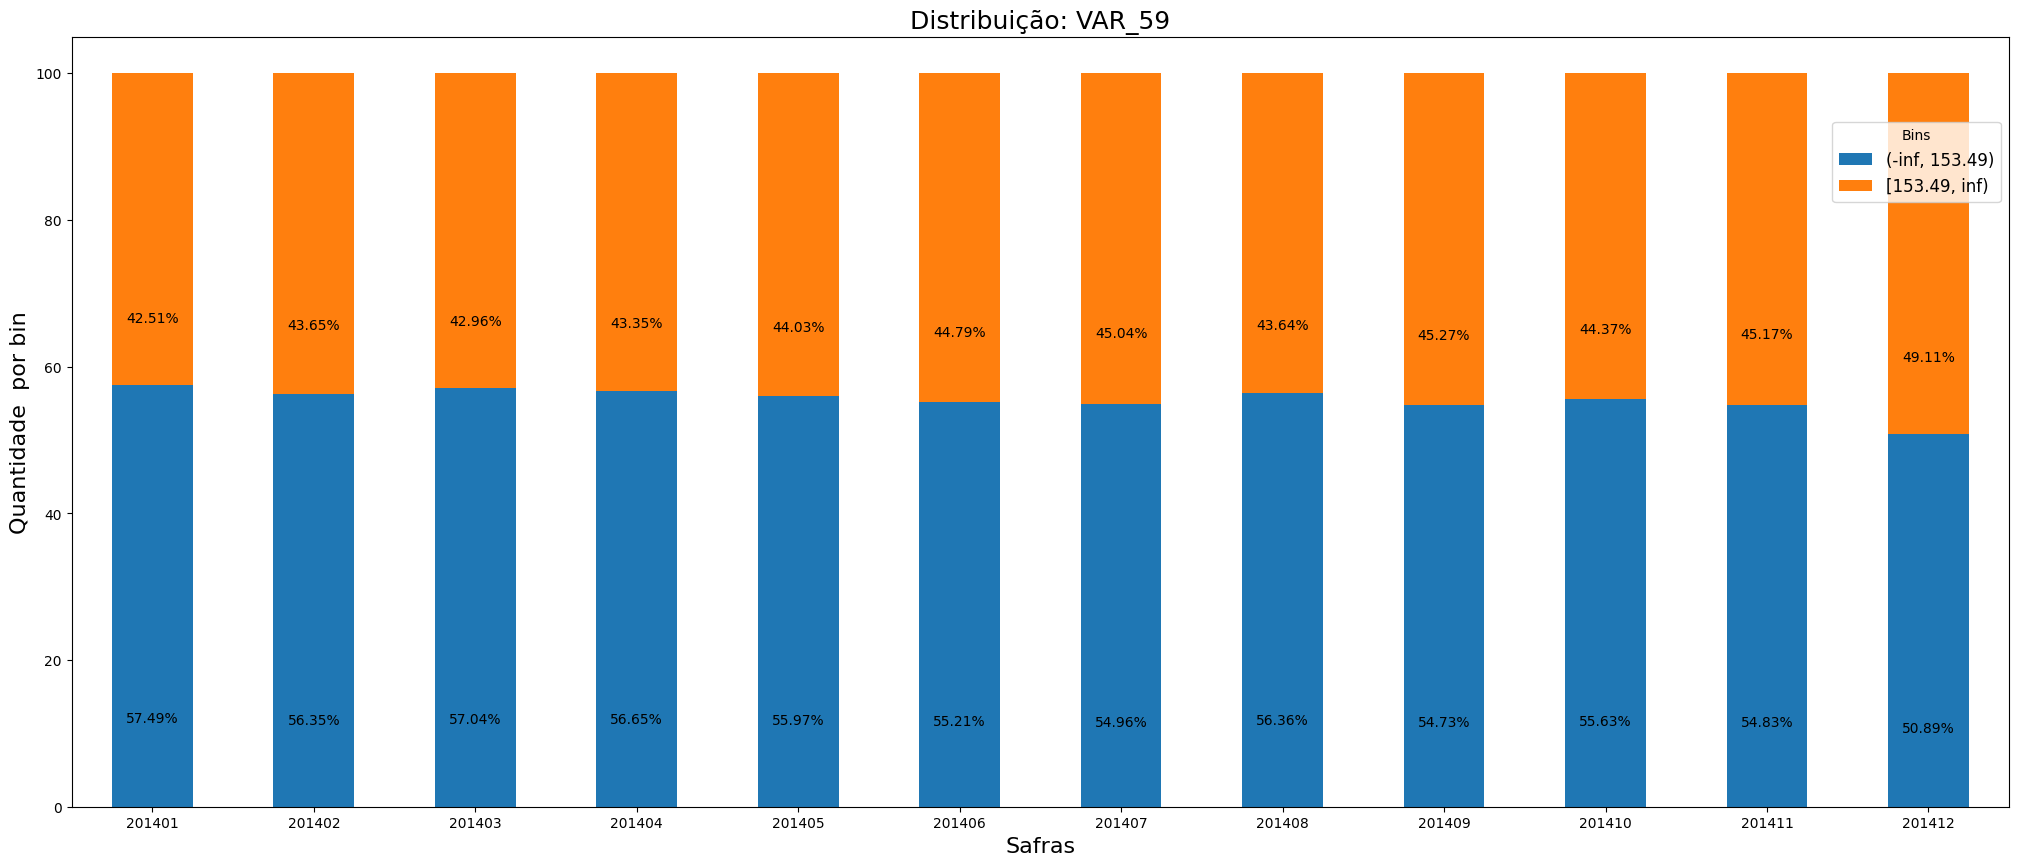

VAR_16_is_null


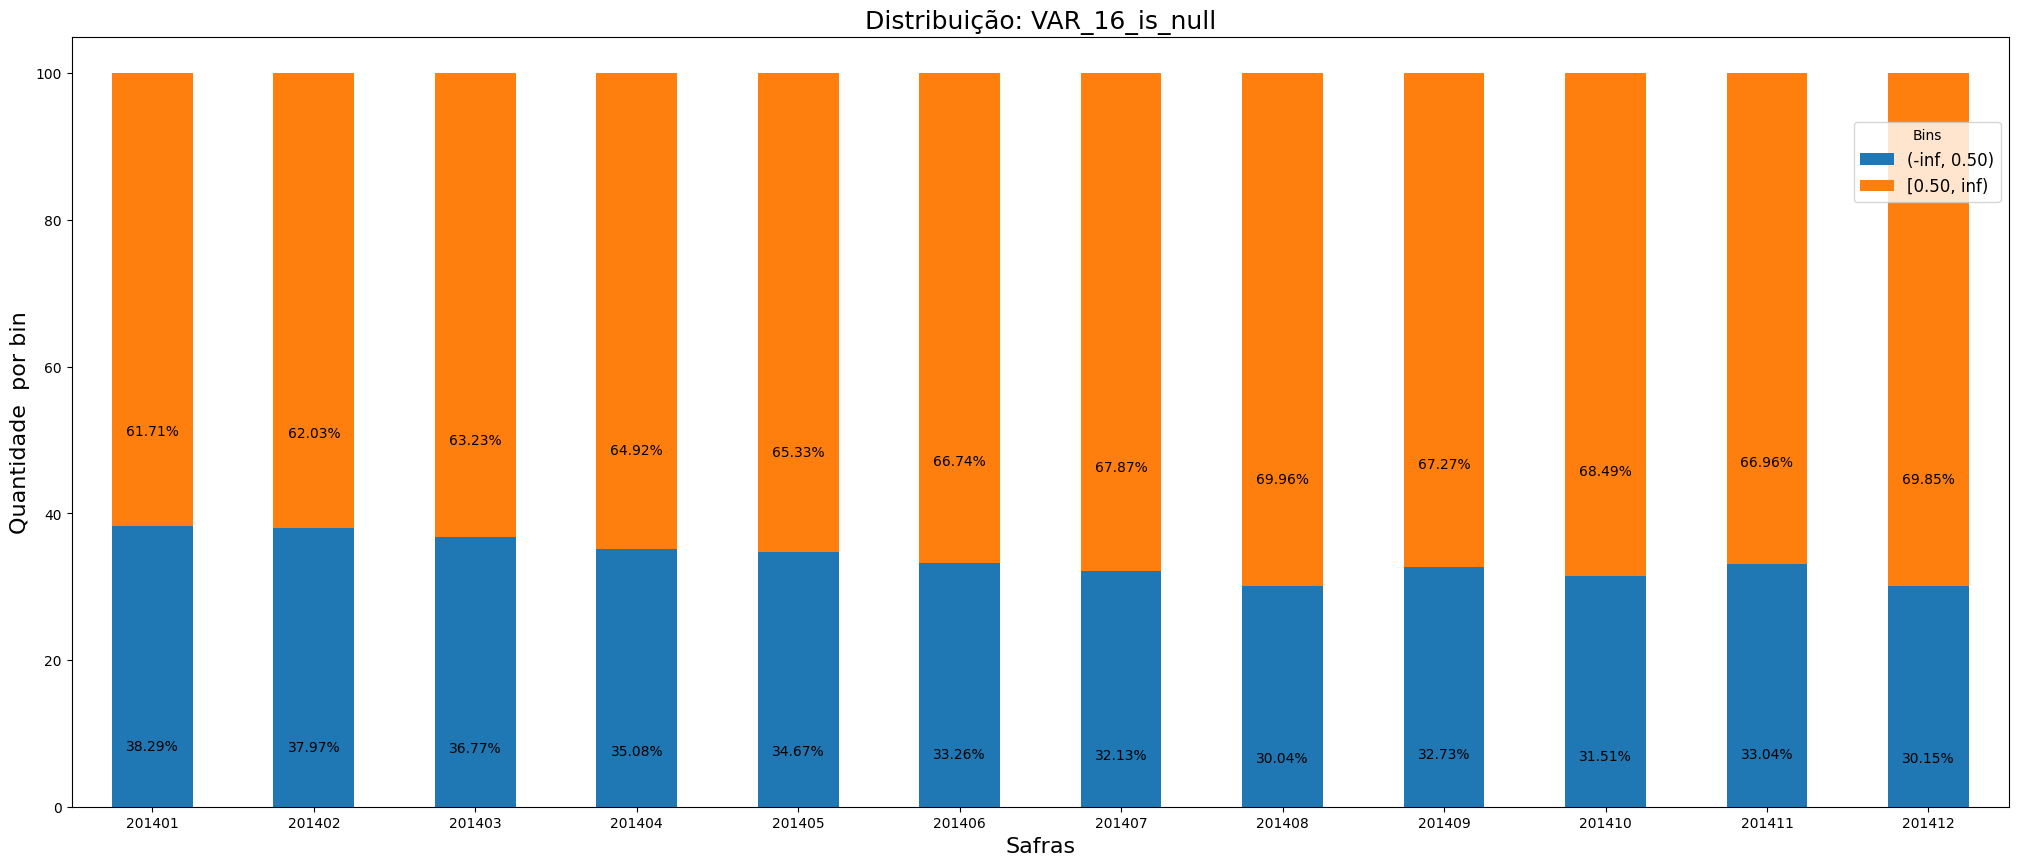

VAR_19


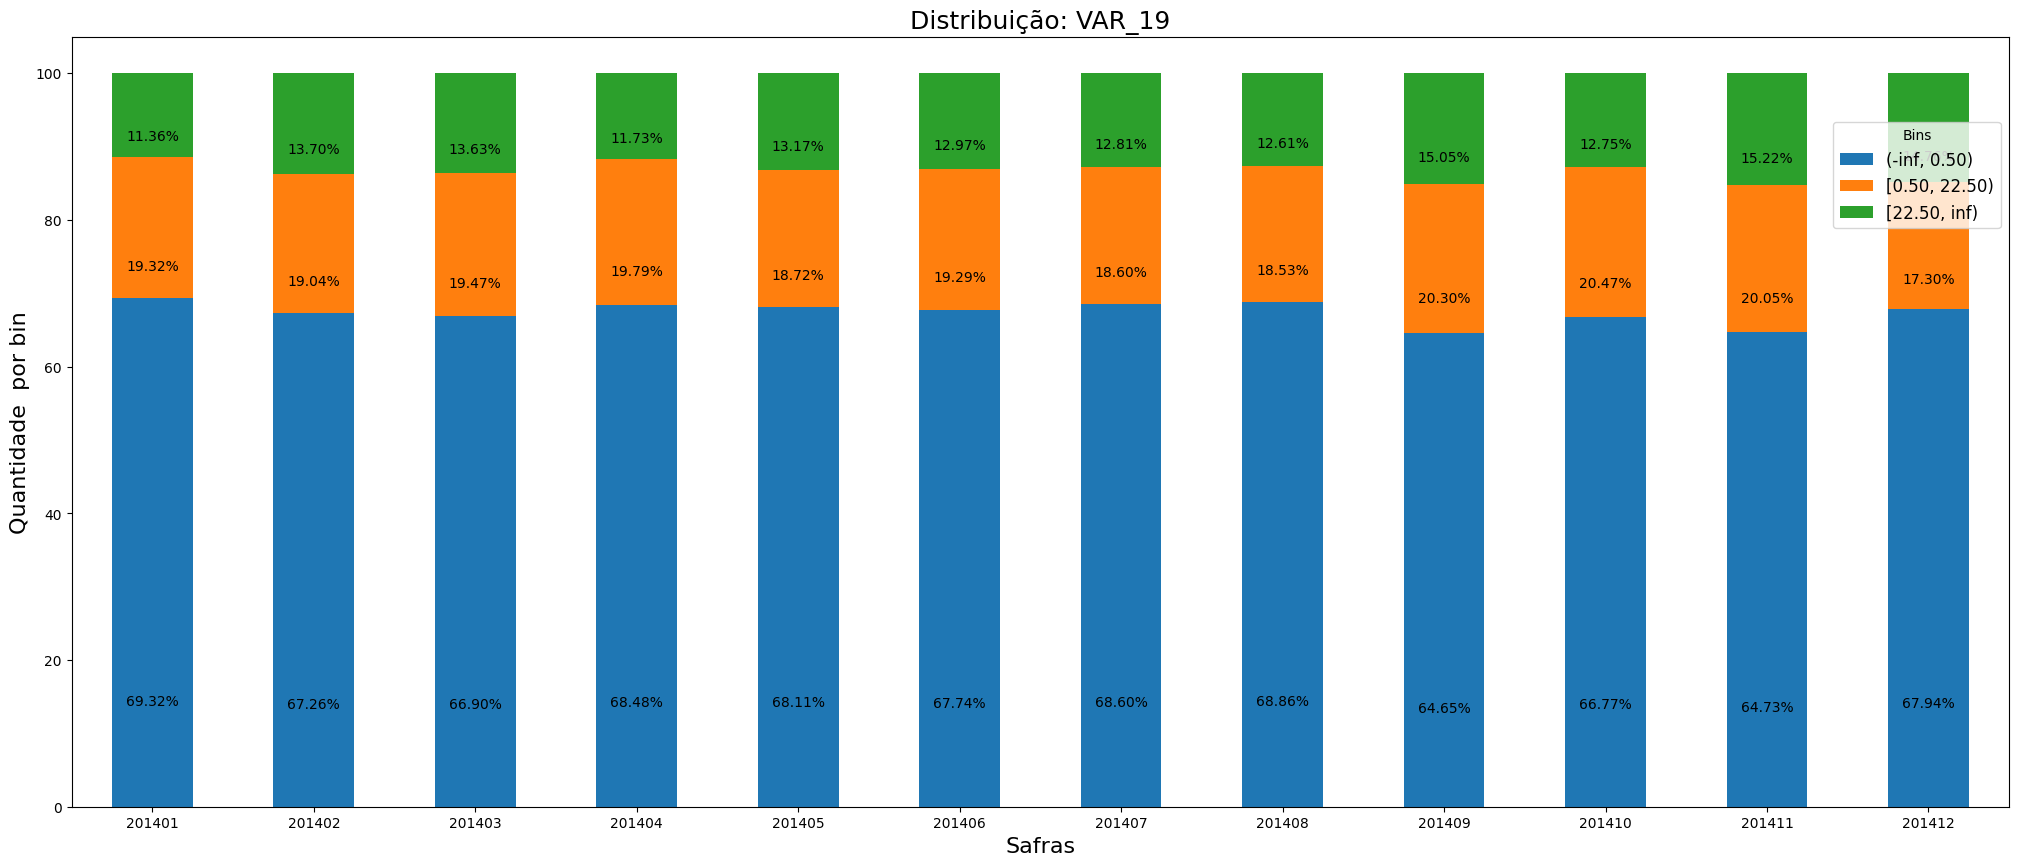

VAR_72


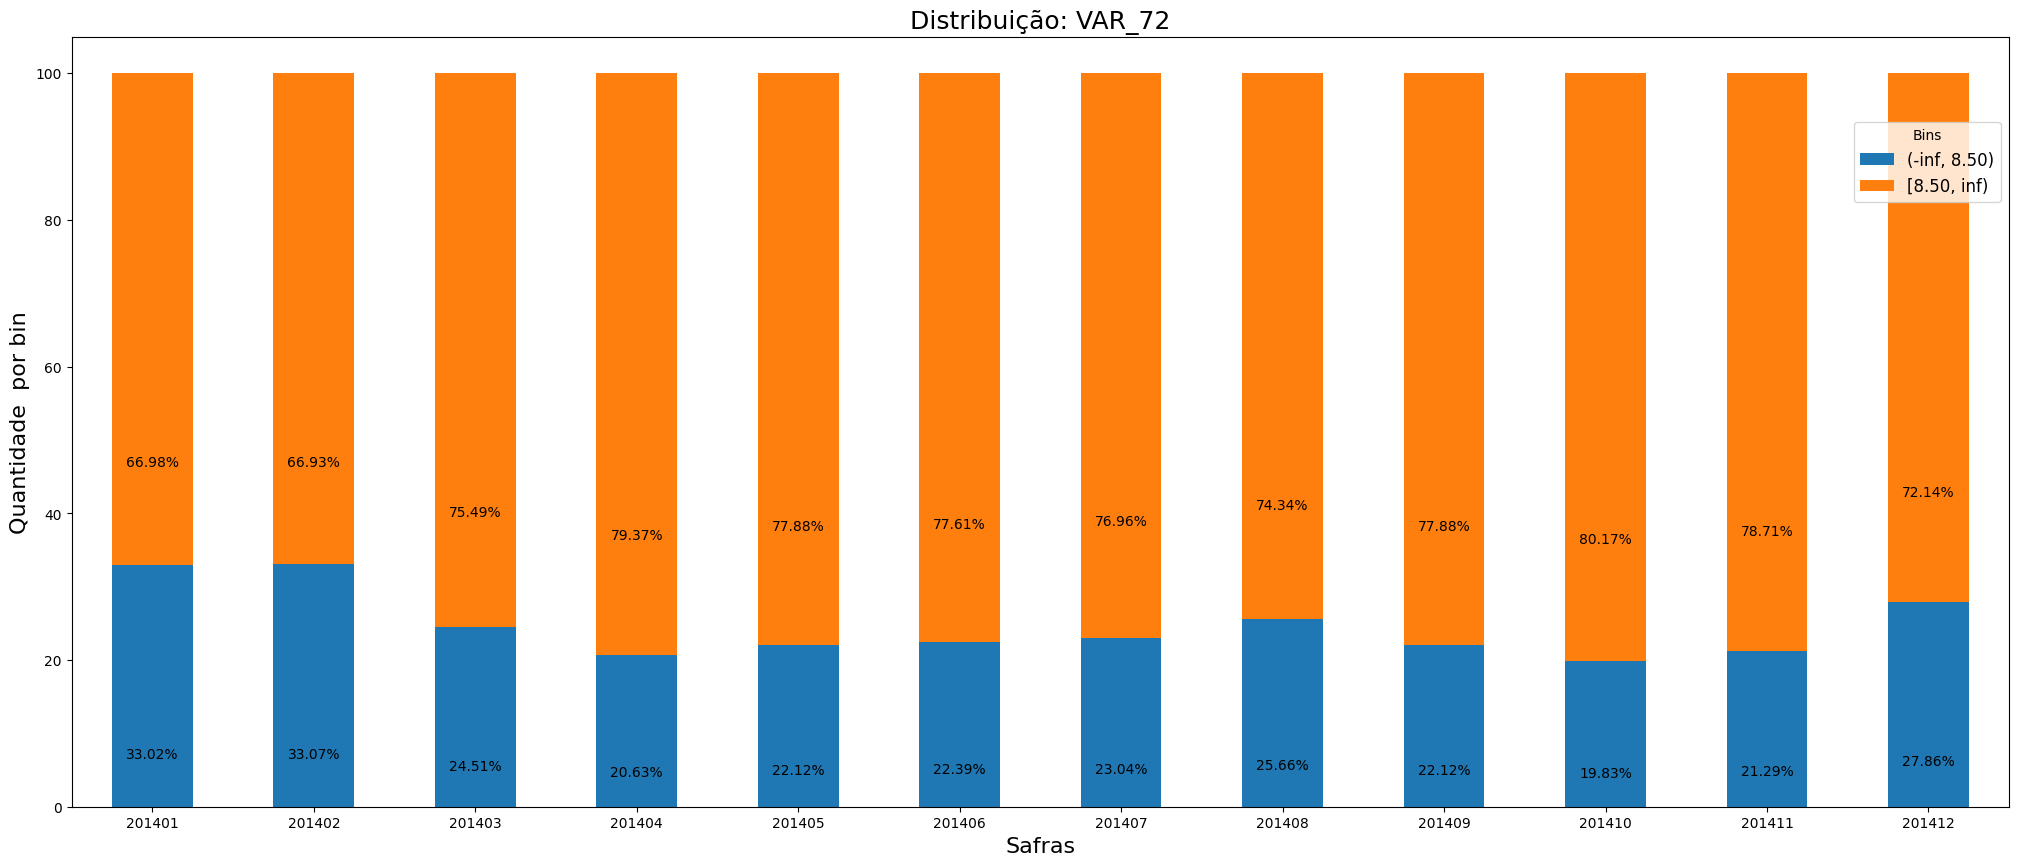

VAR_32


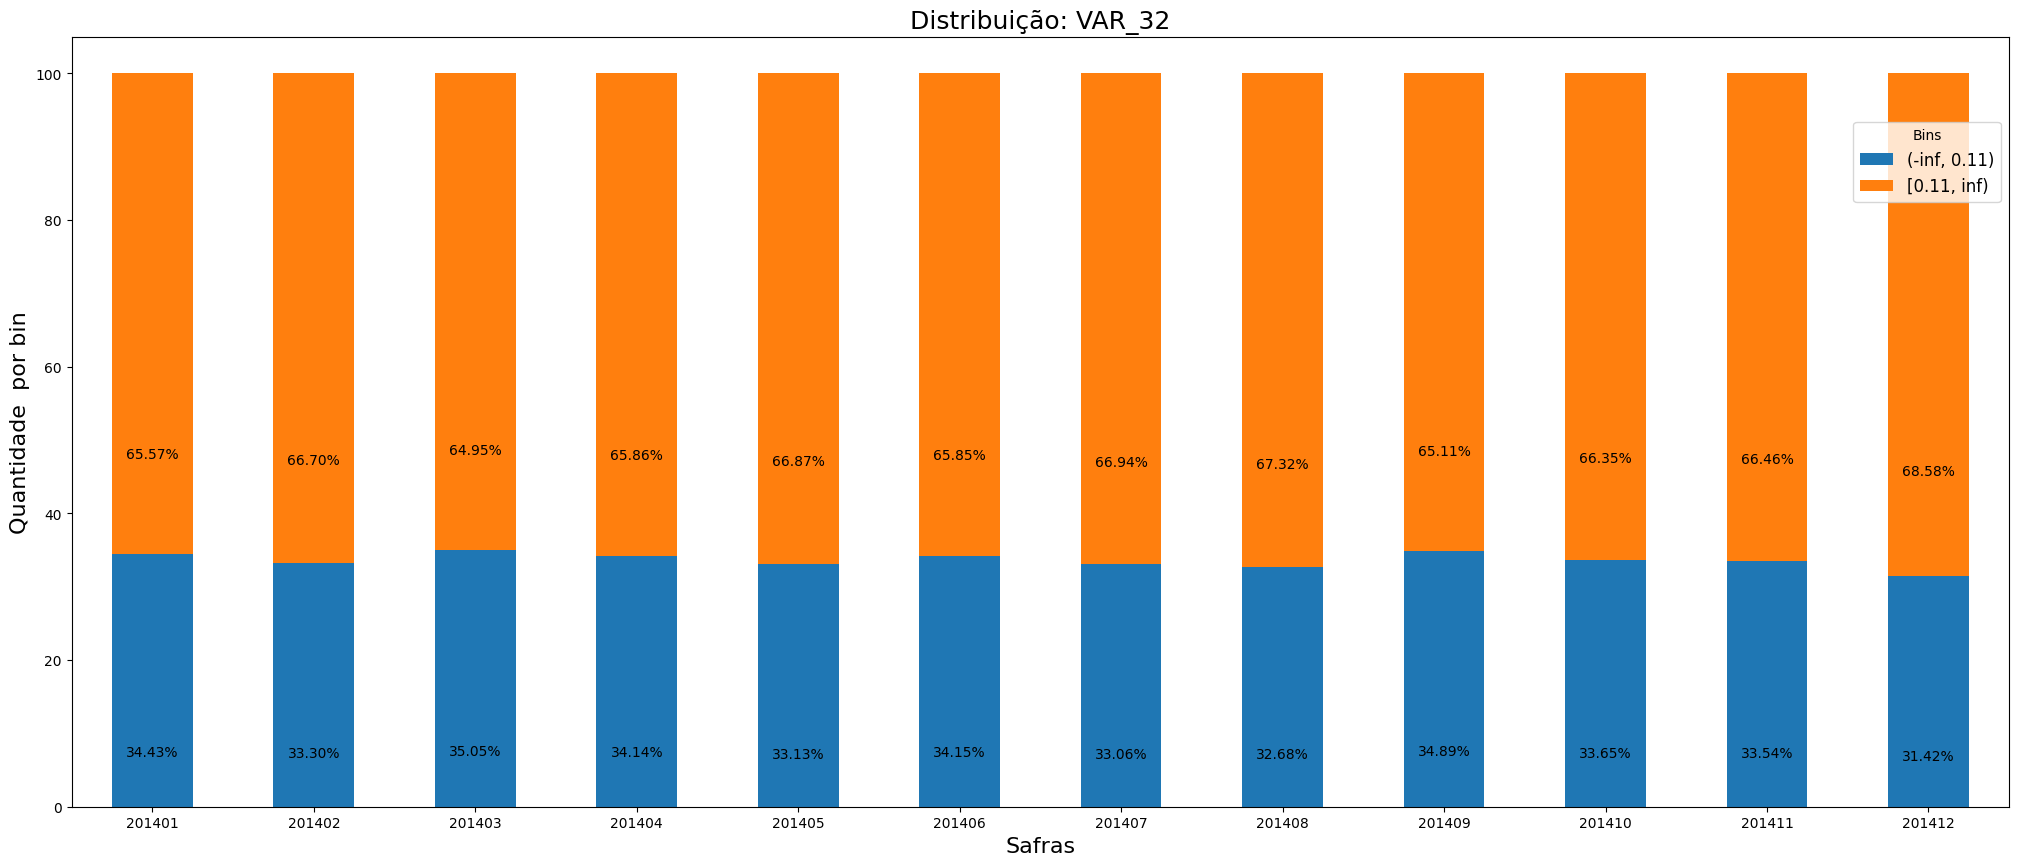

In [87]:
for feature in list_features:
    print(feature)
    df_tmp = df_iv_woe_ref[df_iv_woe_ref['Variable']==feature]
    
    graph_distribution_bins(df_tmp, f"Distribuição: {feature}")

## 3 - Feature Engineering

In [88]:
list_features

['VAR_40',
 'VAR_57',
 'VAR_6',
 'VAR_12_is_null',
 'VAR_64',
 'VAR_1',
 'VAR_9',
 'VAR_30',
 'VAR_25',
 'VAR_31_is_null',
 'VAR_20',
 'VAR_65',
 'VAR_10_is_null',
 'VAR_59',
 'VAR_16_is_null',
 'VAR_19',
 'VAR_72',
 'VAR_32']

In [89]:
dict_bins

{'VAR_40': 3,
 'VAR_12_is_null': 2,
 'VAR_1': 2,
 'VAR_30': 3,
 'VAR_25': 2,
 'VAR_31_is_null': 2,
 'VAR_65': 3,
 'VAR_10_is_null': 2,
 'VAR_6': 3,
 'VAR_57': 3,
 'VAR_64': 2,
 'VAR_9': 3,
 'VAR_20': 2,
 'VAR_59': 2,
 'VAR_16_is_null': 2,
 'VAR_19': 3,
 'VAR_72': 2,
 'VAR_32': 2}

In [90]:
list_filter = ['safra', 'id', target,] + list_features

In [91]:
df_1 = df[list_filter]
df_1.head(3)

,safra,id,y,VAR_40,VAR_57,VAR_6,VAR_12_is_null,VAR_64,VAR_1,VAR_9,VAR_30,VAR_25,VAR_31_is_null,VAR_20,VAR_65,VAR_10_is_null,VAR_59,VAR_16_is_null,VAR_19,VAR_72,VAR_32
0,201404,1,0,9.0,45.0,3277.0,0.0,0.0,0.0,500.00,500.00,12.0,0.0,8.0,1303.79,0.0,95.54,0.0,45.0,151.0,0.133833
1,201407,2,0,5.0,60.0,2443.0,0.0,0.0,64.0,1000.00,1000.00,9.0,0.0,12.0,1486.26,0.0,97.73,0.0,18.0,187.0,0.133833
2,201405,3,0,4.0,31.0,1824.0,0.0,0.0,99.0,1893.35,1893.35,3.0,1.0,12.0,800.27,0.0,294.57,0.0,2.0,96.0,0.133833


In [92]:
list_features_bin = []

for feature in list_features:
    optb = generate_bins_new(df_1[df_1['safra']<=201408], feature, target, dict_bins[feature])
    df_1[f'{feature}_bin'] = optb.transform(df_1[feature], metric='bins')
    
    list_features_bin.append(f'{feature}_bin')

/var/folders/j5/f_z6ggzx709_x61cjbtbj5xr0000gn/T/ipykernel_71655/2230294400.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[f'{feature}_bin'] = optb.transform(df_1[feature], metric='bins')
/var/folders/j5/f_z6ggzx709_x61cjbtbj5xr0000gn/T/ipykernel_71655/2230294400.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[f'{feature}_bin'] = optb.transform(df_1[feature], metric='bins')
/var/folders/j5/f_z6ggzx709_x61cjbtbj5xr0000gn/T/ipykernel_71655/2230294400.py:5: SettingWithCopyWarning: 
A value i

In [93]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(df_1[list_features_bin])

encoded_data = encoder.transform(df_1[list_features_bin])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(list_features_bin))

encoded_df['id'] = list(df_1['id'].values)
encoded_df['safra'] = list(df_1['safra'].values)
encoded_df['y'] = list(df_1['y'].values)

df_final = pd.merge(df_1, encoded_df, on=['id', 'safra', 'y'])

In [94]:
list_cols = list(df_final.columns)
# list_cols.remove(target)

for f_bin in list_features_bin:
    list_cols.remove(f_bin)

list_cols

['safra',
 'id',
 'y',
 'VAR_40',
 'VAR_57',
 'VAR_6',
 'VAR_12_is_null',
 'VAR_64',
 'VAR_1',
 'VAR_9',
 'VAR_30',
 'VAR_25',
 'VAR_31_is_null',
 'VAR_20',
 'VAR_65',
 'VAR_10_is_null',
 'VAR_59',
 'VAR_16_is_null',
 'VAR_19',
 'VAR_72',
 'VAR_32',
 'VAR_40_bin_(-inf, 0.40)',
 'VAR_40_bin_[0.40, 10.50)',
 'VAR_40_bin_[10.50, inf)',
 'VAR_57_bin_(-inf, 38.50)',
 'VAR_57_bin_[38.50, 51.50)',
 'VAR_57_bin_[51.50, inf)',
 'VAR_6_bin_(-inf, 566.50)',
 'VAR_6_bin_[1222.50, inf)',
 'VAR_6_bin_[566.50, 1222.50)',
 'VAR_12_is_null_bin_(-inf, 0.50)',
 'VAR_12_is_null_bin_[0.50, inf)',
 'VAR_64_bin_(-inf, 0.50)',
 'VAR_64_bin_[0.50, inf)',
 'VAR_1_bin_(-inf, 104.50)',
 'VAR_1_bin_[104.50, inf)',
 'VAR_9_bin_(-inf, 344.00)',
 'VAR_9_bin_[1000.01, inf)',
 'VAR_9_bin_[344.00, 1000.01)',
 'VAR_30_bin_(-inf, 327.29)',
 'VAR_30_bin_[327.29, 600.50)',
 'VAR_30_bin_[600.50, inf)',
 'VAR_25_bin_(-inf, 0.10)',
 'VAR_25_bin_[0.10, inf)',
 'VAR_31_is_null_bin_(-inf, 0.50)',
 'VAR_31_is_null_bin_[0.50, inf)'

In [95]:
df_final[list_cols].head()

,safra,id,y,VAR_40,VAR_57,VAR_6,VAR_12_is_null,VAR_64,VAR_1,VAR_9,VAR_30,VAR_25,VAR_31_is_null,VAR_20,VAR_65,VAR_10_is_null,VAR_59,VAR_16_is_null,VAR_19,VAR_72,VAR_32,"VAR_40_bin_(-inf, 0.40)","VAR_40_bin_[0.40, 10.50)","VAR_40_bin_[10.50, inf)","VAR_57_bin_(-inf, 38.50)","VAR_57_bin_[38.50, 51.50)","VAR_57_bin_[51.50, inf)","VAR_6_bin_(-inf, 566.50)","VAR_6_bin_[1222.50, inf)","VAR_6_bin_[566.50, 1222.50)","VAR_12_is_null_bin_(-inf, 0.50)","VAR_12_is_null_bin_[0.50, inf)","VAR_64_bin_(-inf, 0.50)","VAR_64_bin_[0.50, inf)","VAR_1_bin_(-inf, 104.50)","VAR_1_bin_[104.50, inf)","VAR_9_bin_(-inf, 344.00)","VAR_9_bin_[1000.01, inf)","VAR_9_bin_[344.00, 1000.01)","VAR_30_bin_(-inf, 327.29)","VAR_30_bin_[327.29, 600.50)","VAR_30_bin_[600.50, inf)","VAR_25_bin_(-inf, 0.10)","VAR_25_bin_[0.10, inf)","VAR_31_is_null_bin_(-inf, 0.50)","VAR_31_is_null_bin_[0.50, inf)","VAR_20_bin_(-inf, 9.15)","VAR_20_bin_[9.15, inf)","VAR_65_bin_(-inf, 527.23)","VAR_65_bin_[2868.50, inf)","VAR_65_bin_[527.23, 2868.50)","VAR_10_is_null_bin_(-inf, 0.50)","VAR_10_is_null_bin_[0.50, inf)","VAR_59_bin_(-inf, 153.49)","VAR_59_bin_[153.49, inf)","VAR_16_is_null_bin_(-inf, 0.50)","VAR_16_is_null_bin_[0.50, inf)","VAR_19_bin_(-inf, 0.50)","VAR_19_bin_[0.50, 22.50)","VAR_19_bin_[22.50, inf)","VAR_72_bin_(-inf, 8.50)","VAR_72_bin_[8.50, inf)","VAR_32_bin_(-inf, 0.11)","VAR_32_bin_[0.11, inf)"
0,201404,1,0,9.0,45.0,3277.0,0.0,0.0,0.0,500.00,500.00,12.0,0.0,8.0,1303.79,0.0,95.540,0.0,45.0,151.0,0.133833,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,201407,2,0,5.0,60.0,2443.0,0.0,0.0,64.0,1000.00,1000.00,9.0,0.0,12.0,1486.26,0.0,97.730,0.0,18.0,187.0,0.133833,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,201405,3,0,4.0,31.0,1824.0,0.0,0.0,99.0,1893.35,1893.35,3.0,1.0,12.0,800.27,0.0,294.570,0.0,2.0,96.0,0.133833,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,201403,5,1,0.0,38.0,437.0,1.0,1.0,0.0,2000.00,2000.00,0.0,0.0,12.0,1457.78,1.0,55.992,1.0,0.0,75.0,0.090634,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,201405,6,0,0.0,33.0,140.0,1.0,1.0,61.0,400.00,400.00,0.0,1.0,10.0,390.54,1.0,25.591,1.0,0.0,5.0,0.046709,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [96]:
def limpar_nomes_colunas_bin(df):
    colunas_novas = {}
    
    for col in df.columns:
        if 'bin' in col.lower():
            novo_nome = col
            novo_nome = novo_nome.replace(', ', '_')
            novo_nome = novo_nome.replace('.', '_')
            novo_nome = novo_nome.translate(str.maketrans('()[]-', '_____'))
            novo_nome = '_'.join(novo_nome.split())  # remove espaços em branco múltiplos
            novo_nome = novo_nome.replace('__', '_')
            novo_nome = novo_nome.strip('_')
            colunas_novas[col] = novo_nome
            
    df = df.rename(columns=colunas_novas)
    return df

In [97]:
df_tosave = limpar_nomes_colunas_bin(df_final[list_cols])
print(df_tosave.columns)

Index(['safra', 'id', 'y', 'VAR_40', 'VAR_57', 'VAR_6', 'VAR_12_is_null',
       'VAR_64', 'VAR_1', 'VAR_9', 'VAR_30', 'VAR_25', 'VAR_31_is_null',
       'VAR_20', 'VAR_65', 'VAR_10_is_null', 'VAR_59', 'VAR_16_is_null',
       'VAR_19', 'VAR_72', 'VAR_32', 'VAR_40_bin__inf_0_40',
       'VAR_40_bin_0_40_10_50', 'VAR_40_bin_10_50_inf',
       'VAR_57_bin__inf_38_50', 'VAR_57_bin_38_50_51_50',
       'VAR_57_bin_51_50_inf', 'VAR_6_bin__inf_566_50',
       'VAR_6_bin_1222_50_inf', 'VAR_6_bin_566_50_1222_50',
       'VAR_12_is_null_bin__inf_0_50', 'VAR_12_is_null_bin_0_50_inf',
       'VAR_64_bin__inf_0_50', 'VAR_64_bin_0_50_inf', 'VAR_1_bin__inf_104_50',
       'VAR_1_bin_104_50_inf', 'VAR_9_bin__inf_344_00',
       'VAR_9_bin_1000_01_inf', 'VAR_9_bin_344_00_1000_01',
       'VAR_30_bin__inf_327_29', 'VAR_30_bin_327_29_600_50',
       'VAR_30_bin_600_50_inf', 'VAR_25_bin__inf_0_10', 'VAR_25_bin_0_10_inf',
       'VAR_31_is_null_bin__inf_0_50', 'VAR_31_is_null_bin_0_50_inf',
       'VAR_20

In [98]:
df_tosave.head()

,safra,id,y,VAR_40,VAR_57,VAR_6,VAR_12_is_null,VAR_64,VAR_1,VAR_9,VAR_30,VAR_25,VAR_31_is_null,VAR_20,VAR_65,VAR_10_is_null,VAR_59,VAR_16_is_null,VAR_19,VAR_72,VAR_32,VAR_40_bin__inf_0_40,VAR_40_bin_0_40_10_50,VAR_40_bin_10_50_inf,VAR_57_bin__inf_38_50,VAR_57_bin_38_50_51_50,VAR_57_bin_51_50_inf,VAR_6_bin__inf_566_50,VAR_6_bin_1222_50_inf,VAR_6_bin_566_50_1222_50,VAR_12_is_null_bin__inf_0_50,VAR_12_is_null_bin_0_50_inf,VAR_64_bin__inf_0_50,VAR_64_bin_0_50_inf,VAR_1_bin__inf_104_50,VAR_1_bin_104_50_inf,VAR_9_bin__inf_344_00,VAR_9_bin_1000_01_inf,VAR_9_bin_344_00_1000_01,VAR_30_bin__inf_327_29,VAR_30_bin_327_29_600_50,VAR_30_bin_600_50_inf,VAR_25_bin__inf_0_10,VAR_25_bin_0_10_inf,VAR_31_is_null_bin__inf_0_50,VAR_31_is_null_bin_0_50_inf,VAR_20_bin__inf_9_15,VAR_20_bin_9_15_inf,VAR_65_bin__inf_527_23,VAR_65_bin_2868_50_inf,VAR_65_bin_527_23_2868_50,VAR_10_is_null_bin__inf_0_50,VAR_10_is_null_bin_0_50_inf,VAR_59_bin__inf_153_49,VAR_59_bin_153_49_inf,VAR_16_is_null_bin__inf_0_50,VAR_16_is_null_bin_0_50_inf,VAR_19_bin__inf_0_50,VAR_19_bin_0_50_22_50,VAR_19_bin_22_50_inf,VAR_72_bin__inf_8_50,VAR_72_bin_8_50_inf,VAR_32_bin__inf_0_11,VAR_32_bin_0_11_inf
0,201404,1,0,9.0,45.0,3277.0,0.0,0.0,0.0,500.00,500.00,12.0,0.0,8.0,1303.79,0.0,95.540,0.0,45.0,151.0,0.133833,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,201407,2,0,5.0,60.0,2443.0,0.0,0.0,64.0,1000.00,1000.00,9.0,0.0,12.0,1486.26,0.0,97.730,0.0,18.0,187.0,0.133833,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,201405,3,0,4.0,31.0,1824.0,0.0,0.0,99.0,1893.35,1893.35,3.0,1.0,12.0,800.27,0.0,294.570,0.0,2.0,96.0,0.133833,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,201403,5,1,0.0,38.0,437.0,1.0,1.0,0.0,2000.00,2000.00,0.0,0.0,12.0,1457.78,1.0,55.992,1.0,0.0,75.0,0.090634,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,201405,6,0,0.0,33.0,140.0,1.0,1.0,61.0,400.00,400.00,0.0,1.0,10.0,390.54,1.0,25.591,1.0,0.0,5.0,0.046709,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [99]:
df_tosave.to_csv('dados/df_final.csv', index=False)